# MENSTRAUL CYCLE APPS


#### About the problem
It is undeniable that obtaining the proper mobile health application is becoming more difficult with the passage of time. This complication poses numerous issues for various stakeholders, making it difficult to identify appropriate technology/apps to assist them in enhancing their health application usage. This project will attempt to answer the question “How effective are mobile health apps in regard to different usage and what impact does different geographical locations have on the efficiency of these applications.”

#### Objective of this project
A case study of Mobile Health Application (MHAs) in two different regions is used to test this methods (United Kingdom and Africa). The structure is put in place and tested with a small group of people. The MHAs analyzed are basically used to detect and monitor menstruation and ovulation cycle. Five (5) mobile health apps are the focus of this study, namely, Period tracker period calendar, Flo period tracker and calendar, My calendar period tracker, Uteroo and Kunashe Foundation Blossom App.

A 27-item rating scale divided into three sections is used to ensure comprehensive analysis while evaluating the various MHAs to monitor menstrual cycle. However, a 5-point validation tool that aids in app quality assessment is used. These tools are divided into Interaction, Performance, Aesthetics, Description, and Quality Scores. However, 20 of the 27 item rating scale are scored using a 2 point scale (YES or NO), with respondents picking the most preferred and suitable response while 7 of the items rating scale gives a demographic ideology on the respondent.

## Table of contents:

1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#Missing)
5. [Feature engineering](#Engineering)
6. [EXPLORATIVE DATA ANALYSIS](#EDA)
7. [ENCODING](#Encoding)
8. [Correlations - EDA](#Correlations)
9. [Preprocess test dataset](#Preprocess)
10. [Modelling](#Modelling)
11. [Prediction](#Prediction)

<a name="Libraries"></a>
## 1. Importing libraries


In [1]:
#Importing the required libraries
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import matplotlib.pyplot as plt #For visualization
plt.style.use("fivethirtyeight")#For styling the plots
import seaborn as sns #for visualization
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.cluster import KMeans #For clustering
from scipy.stats import mannwhitneyu, shapiro, ttest_ind #For statistical tests
from statsmodels.stats import weightstats as stests #For statistical tests
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #For Scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder #For Encoding
from scipy.spatial.distance import euclidean, cityblock #For distance measurement
import category_encoders as ce #For Encoding
from sklearn.decomposition import PCA #For Principal Components Analysis
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression #To check for feature importance
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression #Algorithms for predictions

<a name="Data"></a>
## 2. Loading data

In [3]:
# Load in datasets
Data_1= pd.read_excel('C:/Users/ADMIN/Documents/gig/Online Survey Form - Research Article.xlsx')# Read in the Menstrual dataset

In [4]:
Data_1.head(10)

,S/N,Submission Date/Time,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,...,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?,IP ADDRESS,Submission ID
0,1,2022-04-07 07:06:10,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Flo,1-2 years,3.0,...,YES,YES,NO,YES,NO,YES,YES,NO,102.89.42.163,5311425513614070000
1,2,2022-04-07 07:06:15,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,Africa,Flo,More than 2 years,3.0,...,YES,YES,NO,YES,NO,YES,YES,NO,129.205.124.226,5315692266221430000
2,3,2022-04-09 07:06:16,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Period Tracker,More than 2 years,4.0,...,YES,YES,NO,NaN,NO,YES,NO,NO,102.219.153.75,5315690775739470000
3,4,2022-04-07 07:06:20,O'Level,18-30 yrs,Single,Christianity,Africa,Flo,Less than a year,2.0,...,YES,YES,NO,YES,NO,YES,YES,NO,105.112.178.189,5315737404023180000
4,5,2022-04-07 07:06:21,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,Flo,1-2 years,5.0,...,YES,YES,NO,YES,NO,YES,YES,NO,65.49.22.66,5315753484023450000
5,6,2022-04-07 07:06:28,M.Sc./M.Ed./MA,18-30 yrs,Married,Christianity,Africa,None,None,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,105.112.177.30,5316132590377680000
6,7,2022-04-07 07:10:10,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,Flo,More than 2 years,5.0,...,NO,YES,NO,YES,NO,YES,YES,NO,105.112.189.238,5310426398329560000
7,8,2022-04-07 07:10:35,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,United Kingdom,Flo,More than 2 years,2.0,...,YES,YES,NO,YES,NO,YES,YES,NO,102.67.9.131,5316142351311240000
8,9,2022-04-07 07:10:01,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,United Kingdom,MyCalender,1-2 years,4.0,...,YES,YES,NO,YES,NO,YES,NO,NO,102.89.32.14,5316149364127670000
9,10,2022-04-07 07:10:10,M.Sc./M.Ed./MA,18-30 yrs,Married,Christianity,United Kingdom,Period Tracker,1-2 years,2.0,...,YES,YES,NO,NaN,NO,YES,YES,NO,102.89.12.39,5316153779325230000


In [5]:
Data_1.shape

(1000, 25)

<a name="Statistics"></a>
## 3. Statistical summaries

In [6]:
# Menstraul cycle statistical summary
Data_1.describe(include = 'all')

,S/N,Submission Date/Time,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,...,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?,IP ADDRESS,Submission ID
count,1000.000000,1000,1000,994,1000,998,1000,995,999,995.000000,...,991,990,995,989,992,987,979,981,1000,197
unique,NaN,976,9,3,3,4,2,6,4,NaN,...,2,2,2,2,2,3,2,2,202,174
top,NaN,2022-06-29 05:57:46,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,MyCalender,1-2 years,NaN,...,YES,NO,YES,YES,NO,YES,YES,NO,105.112.181.50,41.76.155.134
freq,NaN,2,424,595,590,722,588,316,395,NaN,...,558,637,595,711,837,859,493,687,23,4
first,NaN,2022-04-07 07:06:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-07-21 05:12:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.258291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.240910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def fill_missing(data, use_method='ffill', way='dataframe', column=None):
    '''
Function to fill missing values in datasets or individual features, with various methods and ways. It takes in as parameters,
the dataframe, method to be used in filling for missing values, set to ffill by default, ways it should be done,either the
whole dataframe or column wise set to dataframe by default, then column name which was set to none by default.

It uses pandas fillna method for filling for missing values and which takes in methods which are :
ffill = forward fill,  backfill == backward fill, median is using the 50th percentile score to fill it, mean is using the
mean score to fill, and mode is using modal score to fill it. Then setting inplace == True to make it permanent on the
dataframe
    '''
    if way == 'dataframe': # Condition to check way as dataframe
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data.fillna(method='ffill', inplace = True) # forward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data.fillna(method='backfill', inplace = True) # backward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        else :
            data.fillna(use_method, inplace = True) # use impute to fill the missing value
            return data.isnull().sum() # Return the sum of missing values
    elif way == 'feature': # Condition to check way as feature
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data[column].fillna(method='ffill', inplace = True) # forward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data[column].fillna(method='backfill', inplace = True) # backward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'median': # Condition to check for use method as median
            data[column].fillna(data[column].median(), inplace = True) # Use median to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mean': # Condition to check for use method as mean
            data[column].fillna(data[column].mean(), inplace = True) # Use mean to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mode': # Condition to check for use method as mode
            data[column].fillna(data[column].mode()[0], inplace = True) # Use mode to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        else :
            data[column].fillna(use_method, inplace = True) # use impute to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        

In [8]:
def lets_encode(df, cols, package, encoder = None) :
    """
Function For Encoding Categorical Features, various methods for encoding are included in this function, to choose a
method,
Parameters :
df = Dataframe
cols = column or columns needed
package = method of packages to use which can be : le, ce_oe,oh,du,fe,mt
we provide the following short form of methods with its meaning as follows :
le = Label Encoding
ce_oe = categorical encoders Ordinal Encoding
oh = One hot encoding
du = dummy encoding
fe = frequency encoding
mt = mean target encoding

encoder = external method needed for encoding
    """
    encoded_df = df[cols] #Define dataframe to be encoded
    if package == "le" : # Check for the condition of label encoding
        encoded_df = encoded_df.apply(encoder.fit_transform) # Encode the dataframe
        return encoded_df # return the encoded feature
    elif package == "ce_oe" : # Check for categorical encoding condition
        encoded_df = encoder.fit_transform(encoded_df) # Fit and transform the data using categorical encoding
        return encoded_df # Return encoded feature
    elif package == "oh" : # Check for one hot encoding condition
        encoded_df = pd.DataFrame(encoder.fit_transform(encoded_df).toarray()) # fit and transform features using one hot encoding
        return encoded_df # Return the encoded data
    elif package == "du" : # Check condition for get dummy 
        encoded_df = pd.get_dummies(df[cols]) # Dummy the features
        return encoded_df # Return encoded features
    elif package == 'fe' : # Check for the frequency encoder
        encoded_df = df[cols] # Create a dataframe for the encoder
        y = encoded_df.groupby(cols).size().reset_index() # Groupby the frequency of the values of the features to encode
        y.columns = [cols[0], 'freq'+cols[0]] # Change the column names to the groupby names
        encoded_df = pd.merge(encoded_df,y,on = cols[0], how = 'left') # Merge with dataframe
        return encoded_df # return encoded features
    elif package == "mt" : #Check for mean target encoding
        encoded_df = df[cols] # Create its dataframe
        x = encoded_df.groupby([cols[0]])[cols[1]].sum().reset_index() # Get the feature sum by grouping by the feature and target then getting the sum.
        x = x.rename(columns={cols[1]:cols[0]+"_"+cols[1]+"_sum"})# rename the columns to the grouped columns names

        y = encoded_df.groupby([cols[0]])[cols[1]].count().reset_index()# get feature counts by groupby the column to encode and the target
        y = y.rename(columns={cols[1] :cols[0]+"_"+cols[1]+"_Count"}) # Rename the count columns

        z = pd.merge(x,y,on = cols[0], how = 'inner') # Merge the columns together

        z['Target_enc_levels'] = z[cols[0]+"_"+cols[1]+"_sum"]/z[cols[0]+"_"+cols[1]+"_Count"] # Create a new feature by geting the mean 
        encoded_df = pd.merge(encoded_df,z,on = cols[0], how = 'left') # Merge it with the dataframe

        return encoded_df # Return the encoded feature

In [9]:
def Get_summary_stats_category(data, columns):
    '''
    This function is for getting summary statistics of dataframe columns, It takes in the dataframe and relevant columns as 
    parameters, then it uses pandas methods to both get the value_counts and then get columns descriptions using the describe
    method. It then prints out the value counts and returns the summary statistics.
    '''
    stats = data[columns] # Create the stats dataframe
    for i in stats.columns : # Loop through the column
        mode_score = stats[i].mode()[0] # Get the modal score of features
        print(f'modal value for {i} is {mode_score}') # Print the modal score of the feature
        print(f'Unique values for {i} is {stats[i].unique()}') # Print Unique values for the feature
        print(f'The number of unique values for {i} is {stats[i].nunique()}') # Print Number of Unique values for the feture
        print(f' The frequency for {mode_score} is : {stats[i].value_counts()[mode_score]}') # To get the frequency of the modal score
        modal_percent = (stats[i].value_counts()[mode_score]/len(stats[i]) * 100) # To calculate the modal percentage
                         
        print(f'The percentage of the modal score in the distribution is {modal_percent}') # Print the modal percentage
        return stats[i].value_counts().nlargest(10) # return the value_counts for the columns


<a name="Missing"></a>
## 4.Data Cleaning
Steps to take in cleaning our data :
- Check the datasets information.
- Check the datasets missing values and fix it.
- Merge datasets, then recheck the information and missing values, then fix it

In [10]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                           --------------  -----         
 0   S/N                                                                                                                              1000 non-null   int64         
 1   Submission Date/Time                                                                                                             1000 non-null   datetime64[ns]
 2   Education_Qualification                                                                                                          1000 non-null   object        
 3   Age                                                             

In [11]:
# Check for missing values
Data_1.isnull().sum().any()

True

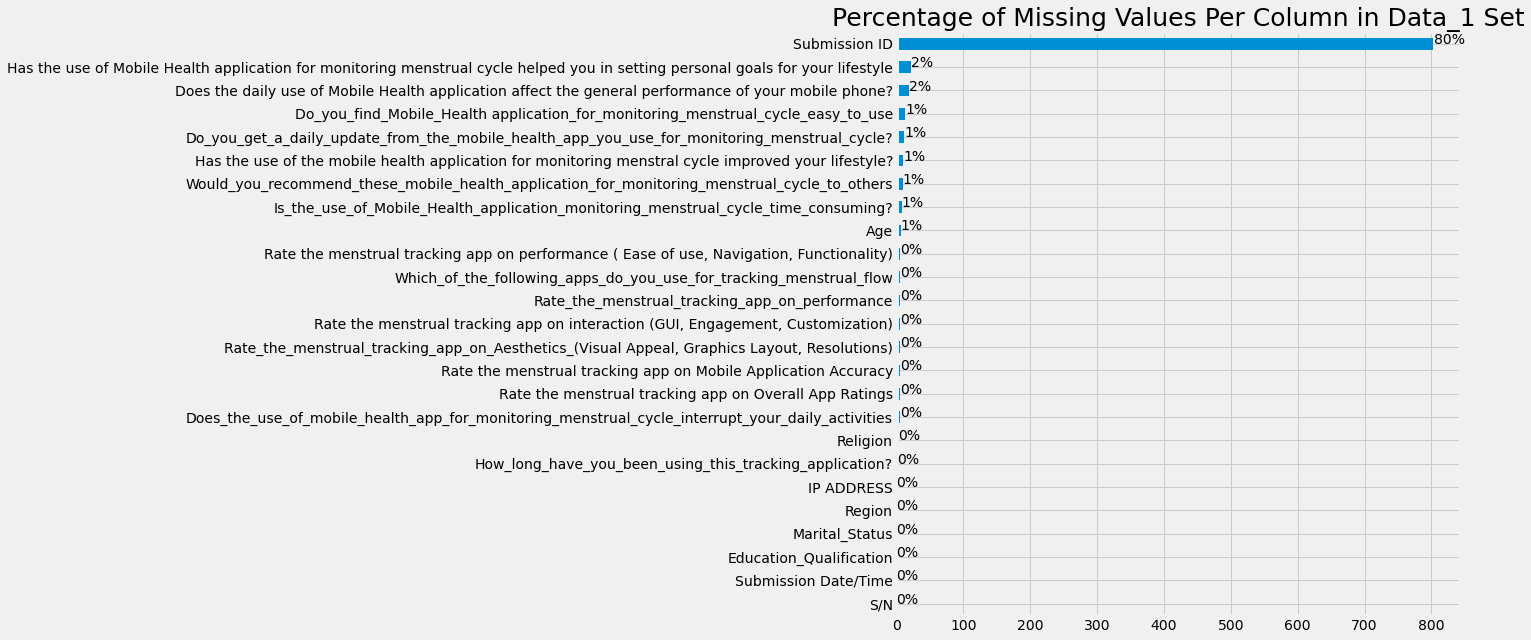

In [12]:
# Plot missing values in Data_1 set
ax = Data_1.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Data_1 Set', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/Data_1.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [13]:
#Dropping some datas due to their extreme missing values and also being of less importance to the analysis
data = Data_1.drop(columns = 'Submission ID')
data = data.drop(columns = 'IP ADDRESS')
data = data.drop(columns ='Submission Date/Time')

data.head(2)

,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
0,1,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Flo,1-2 years,3.0,5.0,...,5.0,4.0,YES,YES,NO,YES,NO,YES,YES,NO
1,2,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,Africa,Flo,More than 2 years,3.0,3.0,...,5.0,5.0,YES,YES,NO,YES,NO,YES,YES,NO


In [14]:
#checking for all None rows in the menstraul tracking app
data.loc[(data['Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow']=='None')]

,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
5,6,M.Sc./M.Ed./MA,18-30 yrs,Married,Christianity,Africa,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN
13,14,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,Africa,None,None,NaN,NaN,...,NaN,NaN,YES,YES,NO,NaN,NO,NaN,NaN,NaN
45,46,M.Sc./M.Ed./MA,31-50 yrs,Single,Christianity,Africa,None,None,NaN,NaN,...,NaN,NaN,YES,YES,NO,NaN,NO,NaN,NaN,NaN
96,97,M.Sc./M.Ed./MA,18-30 yrs,Married,Islam,Africa,None,None,3.0,3.0,...,3.0,3.0,NaN,NO,NaN,YES,NO,NaN,NaN,NaN
196,197,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,None,1-2 years,1.0,4.0,...,2.0,3.0,YES,YES,YES,YES,NO,NaN,NO,NO
231,232,M.Sc./M.Ed./MA,31-50 yrs,Single,Islam,Africa,None,1-2 years,1.0,2.0,...,2.0,3.0,NO,NO,NO,NO,NO,YES,NO,YES
263,264,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,Africa,None,1-2 years,2.0,2.0,...,2.0,5.0,NO,NO,YES,YES,NO,YES,YES,NO
306,307,M.Sc./M.Ed./MA,18-30 yrs,Married,Christianity,Africa,None,1-2 years,4.0,2.0,...,2.0,4.0,YES,YES,YES,NO,YES,YES,YES,NO
335,336,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,Africa,None,More than 2 years,3.0,2.0,...,3.0,2.0,YES,YES,NO,NO,NO,YES,NO,NO
457,458,O'Level,31-50 yrs,Married,Christianity,Africa,None,More than 2 years,3.0,2.0,...,2.0,2.0,NO,YES,YES,YES,YES,YES,YES,NO


In [15]:
#dropping all None rows since they are not needed in the model building 
data = data.drop(index=5)
data = data.drop(index=13)
data = data.drop(index=45)
data = data.drop(index=96)
data = data.drop(index=196)
data = data.drop(index=231)
data = data.drop(index=263)
data = data.drop(index=306)
data = data.drop(index=335)
data = data.drop(index=457)
data = data.drop(index=477)
data = data.drop(index=497)
data = data.drop(index=527)
data = data.drop(index=587)
data = data.drop(index=631)
data = data.drop(index=646)
data = data.drop(index=675)
data = data.drop(index=714)
data = data.drop(index=740)
data = data.drop(index=825)
data = data.drop(index=848)
data = data.drop(index=886)
data = data.drop(index=911)
data = data.drop(index=940)
data = data.drop(index=972)

data.head()


,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
0,1,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Flo,1-2 years,3.0,5.0,...,5.0,4.0,YES,YES,NO,YES,NO,YES,YES,NO
1,2,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,Africa,Flo,More than 2 years,3.0,3.0,...,5.0,5.0,YES,YES,NO,YES,NO,YES,YES,NO
2,3,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Period Tracker,More than 2 years,4.0,5.0,...,5.0,3.0,YES,YES,NO,NaN,NO,YES,NO,NO
3,4,O'Level,18-30 yrs,Single,Christianity,Africa,Flo,Less than a year,2.0,3.0,...,4.0,3.0,YES,YES,NO,YES,NO,YES,YES,NO
4,5,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,Flo,1-2 years,5.0,2.0,...,3.0,2.0,YES,YES,NO,YES,NO,YES,YES,NO


In [16]:
#rechecking for all None rows in the menstraul tracking app
data.loc[(data['Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow']=='None')]

,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?


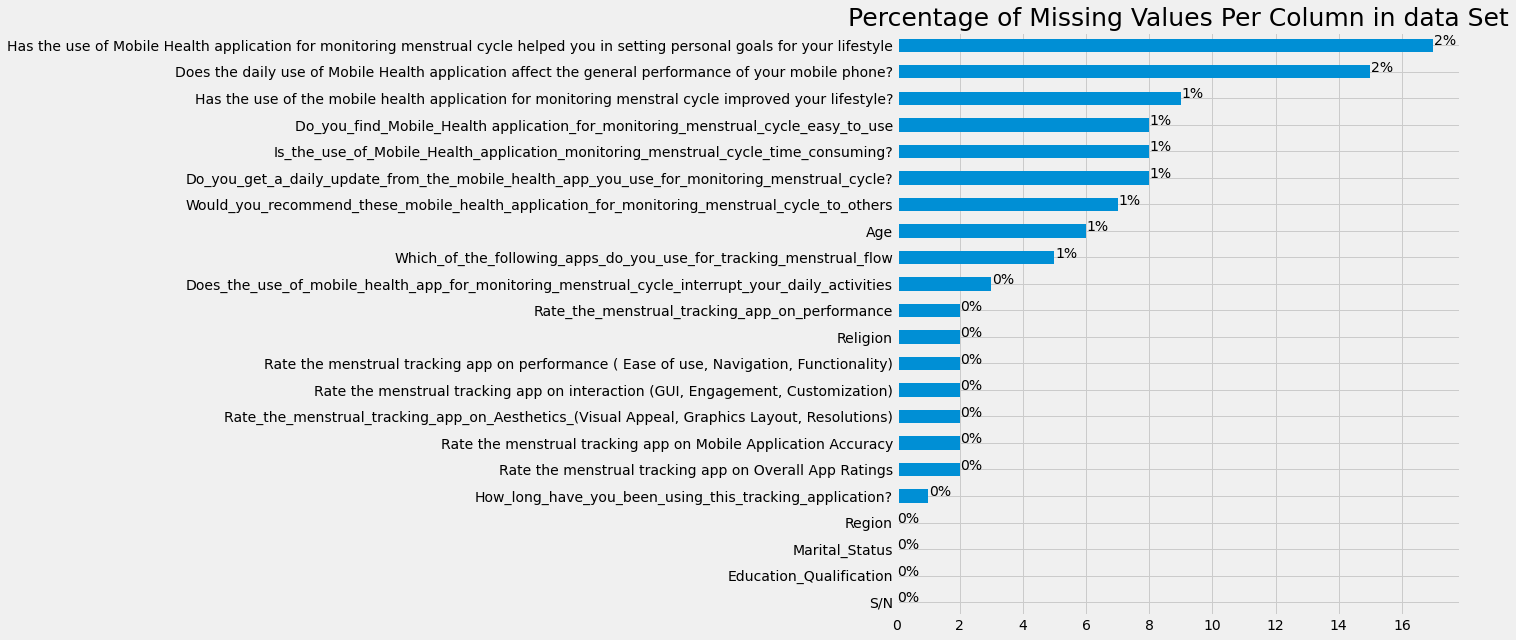

In [17]:
# Plot missing values in data set to confirm the dropped datas
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in data Set', fontdict={'size':25})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [18]:
#Filling Missing Values using mode method since its a categorical dataset
fill_missing(data)
fill_missing(data, 'mode')

S/N                                                                                                                                0
Education_Qualification                                                                                                            0
Age                                                                                                                                0
Marital_Status                                                                                                                     0
Religion                                                                                                                           0
Region                                                                                                                             0
Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow                                                                 0
How_long_have_you_been_using_this_tracking_application?              

In [19]:
data.head(20)

,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
0,1,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Flo,1-2 years,3.0,5.0,...,5.0,4.0,YES,YES,NO,YES,NO,YES,YES,NO
1,2,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,Africa,Flo,More than 2 years,3.0,3.0,...,5.0,5.0,YES,YES,NO,YES,NO,YES,YES,NO
2,3,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Period Tracker,More than 2 years,4.0,5.0,...,5.0,3.0,YES,YES,NO,YES,NO,YES,NO,NO
3,4,O'Level,18-30 yrs,Single,Christianity,Africa,Flo,Less than a year,2.0,3.0,...,4.0,3.0,YES,YES,NO,YES,NO,YES,YES,NO
4,5,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,Flo,1-2 years,5.0,2.0,...,3.0,2.0,YES,YES,NO,YES,NO,YES,YES,NO
6,7,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,Flo,More than 2 years,5.0,3.0,...,3.0,4.0,NO,YES,NO,YES,NO,YES,YES,NO
7,8,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,United Kingdom,Flo,More than 2 years,2.0,4.0,...,5.0,4.0,YES,YES,NO,YES,NO,YES,YES,NO
8,9,B.Sc./B.Ed./B.Engr,18-30 yrs,Married,Christianity,United Kingdom,MyCalender,1-2 years,4.0,5.0,...,3.0,5.0,YES,YES,NO,YES,NO,YES,NO,NO
9,10,M.Sc./M.Ed./MA,18-30 yrs,Married,Christianity,United Kingdom,Period Tracker,1-2 years,2.0,3.0,...,4.0,5.0,YES,YES,NO,YES,NO,YES,YES,NO
10,11,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,United Kingdom,MyCalender,1-2 years,5.0,3.0,...,5.0,5.0,YES,YES,NO,YES,NO,YES,YES,NO


In [20]:
data.tail(10)

,S/N,Education_Qualification,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
990,991,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,Period Tracker,More than 2 years,4.0,3.0,...,3.0,2.0,YES,YES,YES,YES,NO,YES,NO,NO
991,992,B.Sc./B.Ed./B.Engr,18-30 yrs,Single,Christianity,Africa,MyCalender,More than 2 years,2.0,5.0,...,5.0,3.0,YES,NO,NO,YES,NO,YES,NO,NO
992,993,B.Sc./B.Ed./B.Engr,31-50 yrs,Single,Christianity,United Kingdom,Flo,Less than a year,4.0,3.0,...,4.0,3.0,YES,NO,NO,NO,NO,YES,YES,YES
993,994,M.Sc./M.Ed./MA,31-50 yrs,Single,Christianity,United Kingdom,MyCalender,1-2 years,5.0,4.0,...,2.0,4.0,YES,NO,YES,YES,NO,YES,NO,YES
994,995,M.Sc./M.Ed./MA,18-30 yrs,Single,Christianity,United Kingdom,MyCalender,More than 2 years,1.0,5.0,...,3.0,5.0,YES,NO,YES,NO,NO,YES,NO,YES
995,996,B.Sc./B.Ed./B.Engr,31-50 yrs,Married,Christianity,United Kingdom,Flo,More than 2 years,4.0,3.0,...,4.0,3.0,NO,NO,YES,NO,NO,YES,YES,YES
996,997,B.Sc./B.Ed./B.Engr,31-50 yrs,Single,Christianity,United Kingdom,Flo,1-2 years,3.0,3.0,...,3.0,2.0,NO,NO,YES,YES,NO,YES,NO,YES
997,998,OND/HND,31-50 yrs,Single,Christianity,United Kingdom,Period Tracker,More than 2 years,2.0,4.0,...,2.0,4.0,NO,NO,NO,YES,NO,NO,NO,YES
998,999,B.Sc./B.Ed./B.Engr,31-50 yrs,Married,Christianity,United Kingdom,MyCalender,1-2 years,4.0,5.0,...,4.0,4.0,NO,NO,YES,YES,NO,NO,NO,YES
999,1000,B.Sc./B.Ed./B.Engr,31-50 yrs,Married,Islam,United Kingdom,MyCalender,1-2 years,4.0,3.0,...,3.0,4.0,NO,NO,YES,YES,NO,NO,NO,YES


In [21]:
#dropping the education quailification due to mix of inters and strings
data = data.drop(columns = 'Education_Qualification')

In [22]:
# Check for missing values
data.isnull().sum().any()

False

In [23]:
data.shape

(975, 21)

In [24]:
# Check for duplicates
data.duplicated().any()

False

In [25]:
data.describe(include = 'object')

,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
count,975,975,975,975,975,975,975,975,975,975,975,975,975,975
unique,3,3,4,2,5,4,2,2,2,2,2,3,2,2
top,18-30 yrs,Single,Christianity,Africa,MyCalender,1-2 years,YES,NO,YES,YES,NO,YES,YES,NO
freq,578,578,712,564,316,388,558,624,583,713,816,846,490,679


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   S/N                                                                                                                              975 non-null    int64  
 1   Age                                                                                                                              975 non-null    object 
 2   Marital_Status                                                                                                                   975 non-null    object 
 3   Religion                                                                                            

<a name="EDA"></a>
## 6. EXPLORATIVE DATA ANALYSIS
- Following a thorough data cleaning we have a total of 21 columns including
    - 7 demographical section
    - and other columns involving Interaction, Performance, Aesthetics, Description and Quality survey.

In [27]:
#copying the dataframe for ease of with analysis
data_2 = data.copy()

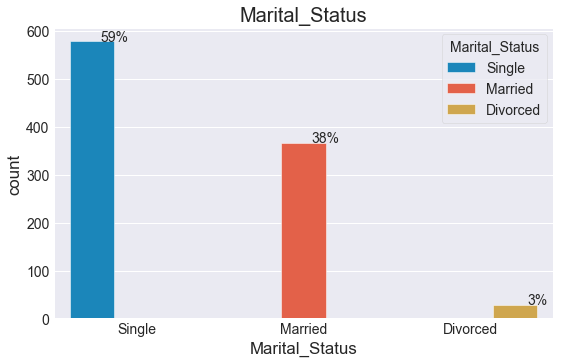

In [28]:
# Marital status of Users

sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
total = float(len(data_2))
ax=sns.countplot(x="Marital_Status", hue = "Marital_Status", data=data_2)
plt.title('Marital_Status', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')

plt.show()

In [29]:
Get_summary_stats_category(data_2, ['Marital_Status'])

modal value for Marital_Status is Single
Unique values for Marital_Status is ['Single' 'Married' 'Divorced']
The number of unique values for Marital_Status is 3
 The frequency for Single is : 578
The percentage of the modal score in the distribution is 59.282051282051285


Single      578
Married     367
Divorced     30
Name: Marital_Status, dtype: int64

**Insights**
- Its is observed that singles are the major users of these apps followed by the married

In [30]:
data_2['Region'].replace(['Africa','United Kingdom'],[1,2], inplace=True)

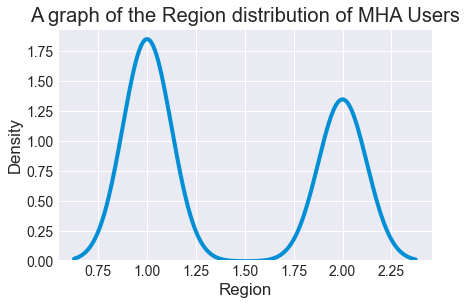

In [31]:
#Plot for distribution of sunset data range
sns.kdeplot(data= data_2, x='Region')
plt.title("A graph of the Region distribution of MHA Users")
plt.show()

In [32]:
Get_summary_stats_category(data_2, ['Region'])

modal value for Region is 1
Unique values for Region is [1 2]
The number of unique values for Region is 2
 The frequency for 1 is : 564
The percentage of the modal score in the distribution is 57.84615384615385


1    564
2    411
Name: Region, dtype: int64

- Its is observed that Africa denoting as 1 above are the highest number of users in our data collection

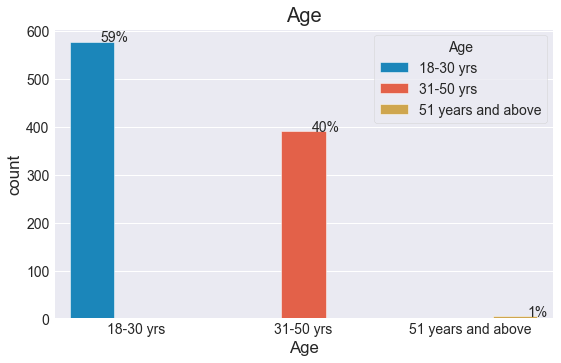

In [33]:
# Age bracket of users
#data['Age'].replace(['18-30 yrs', '31-50 yrs','51 years and above '], [0,1,2], inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
total = float(len(data_2))
ax=sns.countplot(x="Age", hue = "Age", data=data_2)
plt.title('Age', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')
plt.show()

In [34]:
Get_summary_stats_category(data_2, ['Age'])

modal value for Age is 18-30 yrs
Unique values for Age is ['18-30 yrs' '31-50 yrs' '51 years and above']
The number of unique values for Age is 3
 The frequency for 18-30 yrs is : 578
The percentage of the modal score in the distribution is 59.282051282051285


18-30 yrs             578
31-50 yrs             391
51 years and above      6
Name: Age, dtype: int64

**Insights**
- Females within the age bracket of 18-30 are the main users of this apps

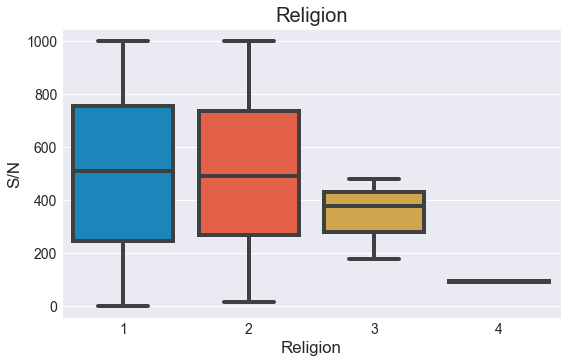

In [35]:
# Users base on Religion
data_2['Religion'].replace(['Christianity','Islam','Traditional', 'Atheist'],[1,2,3,4], inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
total = float(len(data_2))
ax=sns.boxplot(x="Religion", y = "S/N", data=data_2)
plt.title('Religion', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')
plt.show()

In [36]:
Get_summary_stats_category(data_2, ['Religion'])

modal value for Religion is 1
Unique values for Religion is [1 2 4 3]
The number of unique values for Religion is 4
 The frequency for 1 is : 712
The percentage of the modal score in the distribution is 73.02564102564104


1    712
2    258
3      3
4      2
Name: Religion, dtype: int64

- Christians are the highest number of users of the MHAs

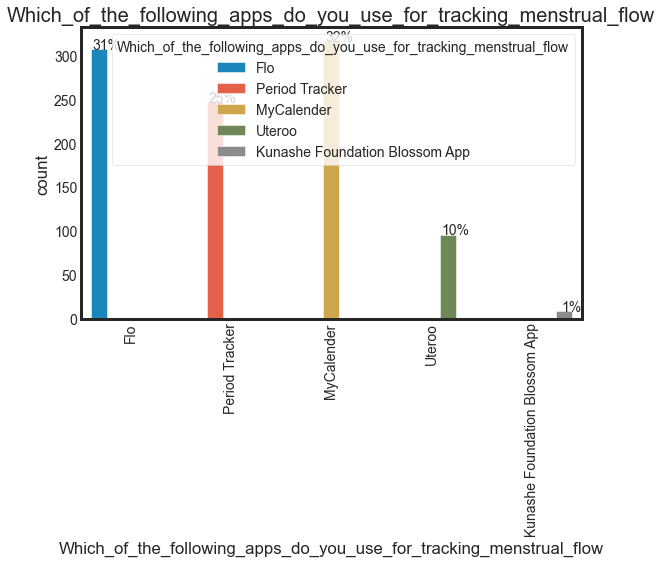

In [37]:
# Users who have heard of Mobile Health Application

sns.set_style('white')
plt.figure(figsize=(8, 5))
total = float(len(data_2))
ax=sns.countplot(x="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow", hue = "Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow", data=data_2)
plt.title('Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow', fontsize = 20)
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y), ha='center')
plt.tick_params(axis='x', rotation=90)
plt.show()

In [38]:
Get_summary_stats_category(data_2, ['Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow'])

modal value for Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow is MyCalender
Unique values for Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow is ['Flo' 'Period Tracker' 'MyCalender' 'Uteroo'
 'Kunashe Foundation Blossom App']
The number of unique values for Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow is 5
 The frequency for MyCalender is : 316
The percentage of the modal score in the distribution is 32.41025641025641


MyCalender                        316
Flo                               307
Period Tracker                    247
Uteroo                             96
Kunashe Foundation Blossom App      9
Name: Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow, dtype: int64

### Plotting used menstraul app against other attributes since its the target column

<Figure size 2160x2880 with 0 Axes>

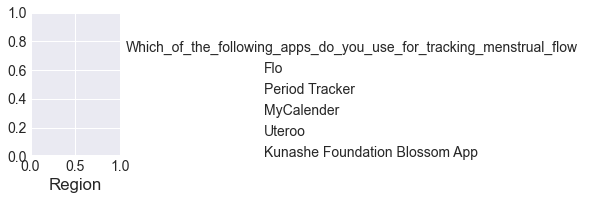

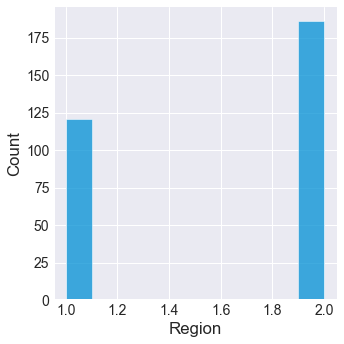

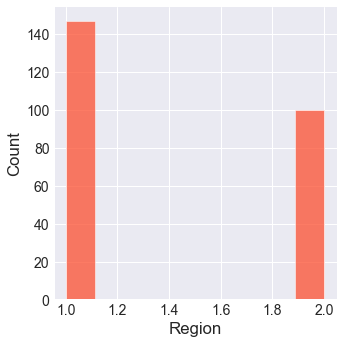

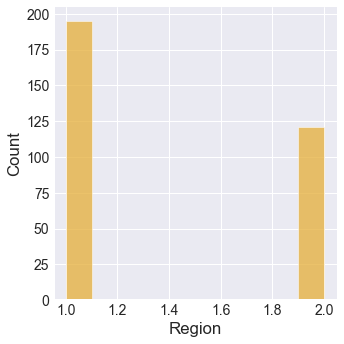

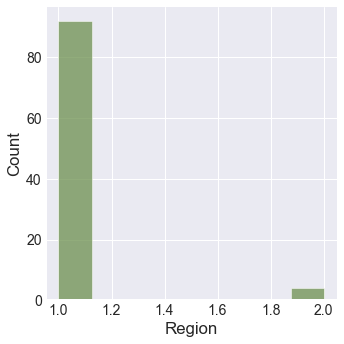

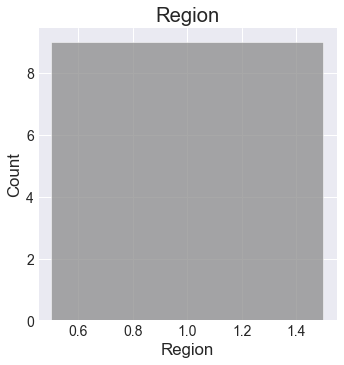

In [39]:
#Region of users
sns.set_style('darkgrid')
plt.figure(figsize=(30,40))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Region',).add_legend()
plt.title('Region')
plt.show()

<Figure size 576x360 with 0 Axes>

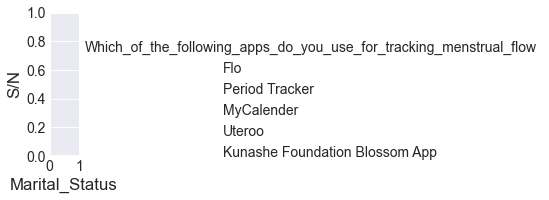

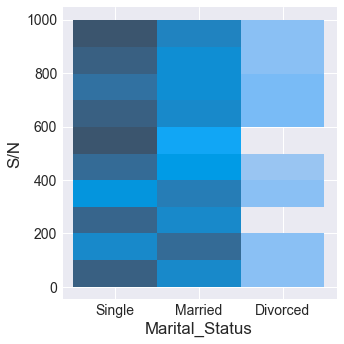

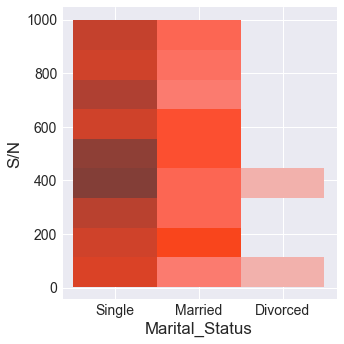

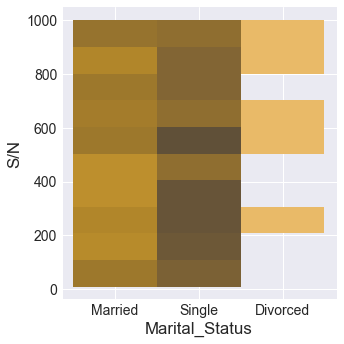

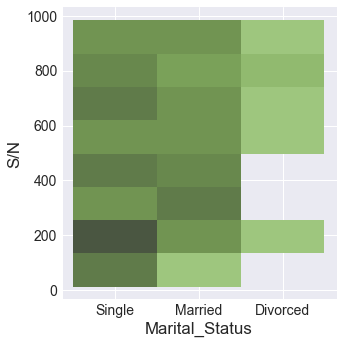

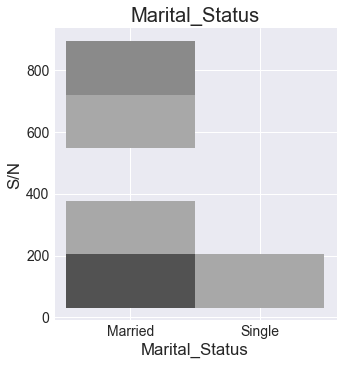

In [40]:
#Marital status in relation to users
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Marital_Status','S/N').add_legend()
plt.title('Marital_Status')
plt.show()

<Figure size 576x360 with 0 Axes>

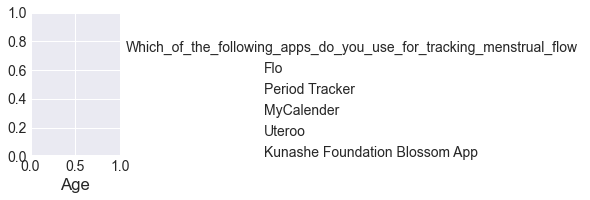

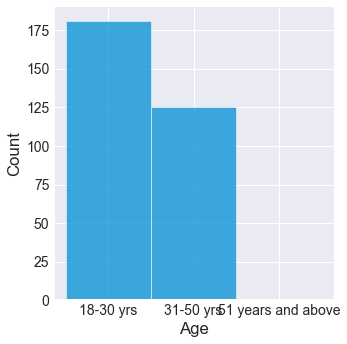

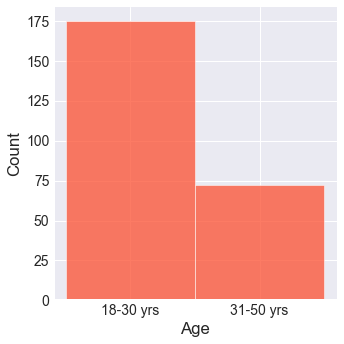

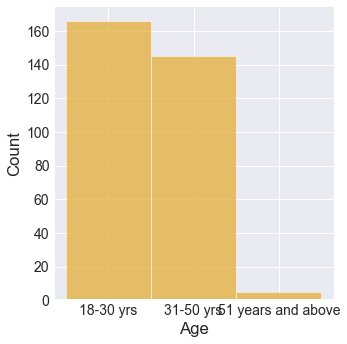

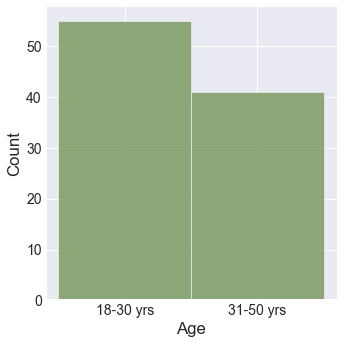

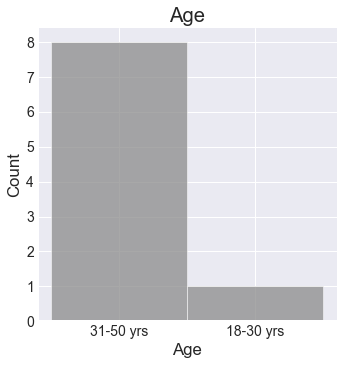

In [41]:
# Age of users in respect to app
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Age').add_legend()
plt.title('Age')
plt.show()

<Figure size 576x360 with 0 Axes>

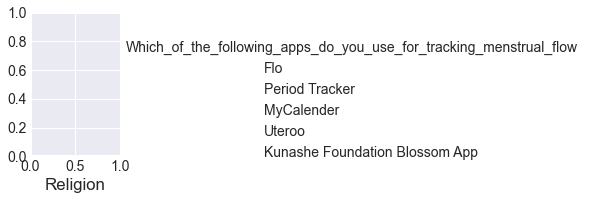

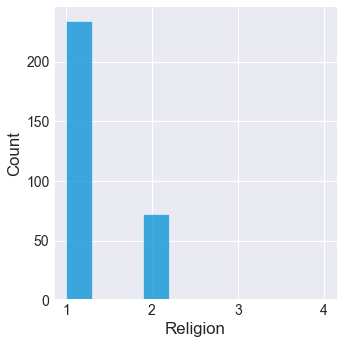

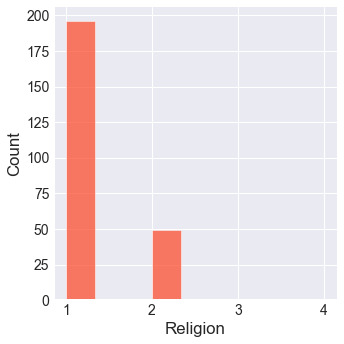

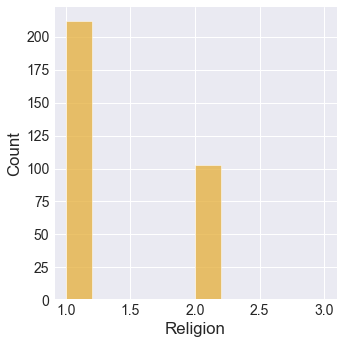

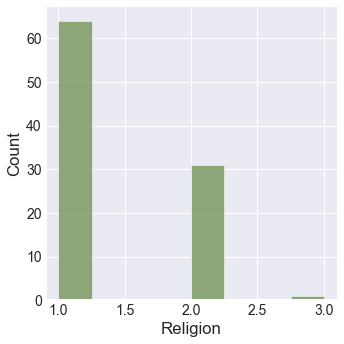

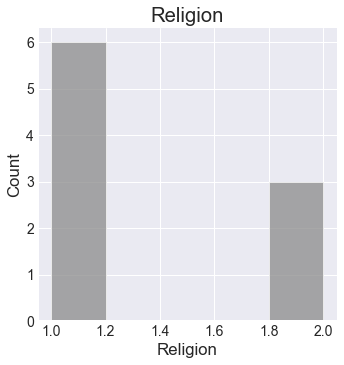

In [42]:
# Age of users in respect to app
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Religion').add_legend()
plt.title('Religion')
plt.show()

In [43]:
#coverting the Rate_the_menstrual_tracking_app_on_performance integer to objects for better visualization
data_2['Rate_the_menstrual_tracking_app_on_performance'].replace([1, 2,3,4,5], ['Bad','Poor','Fair','Good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

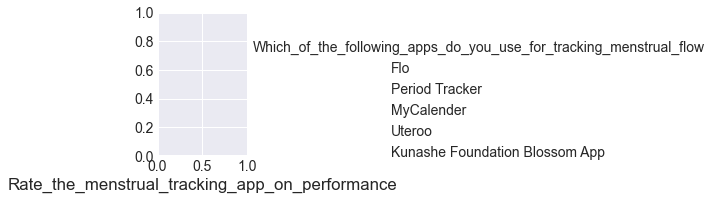

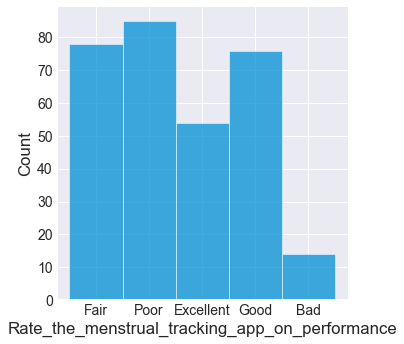

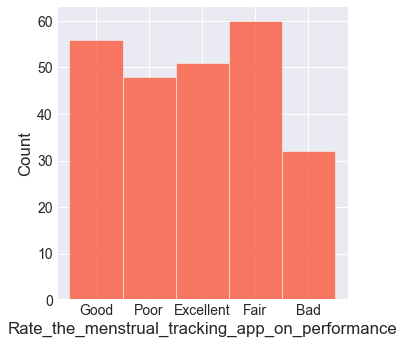

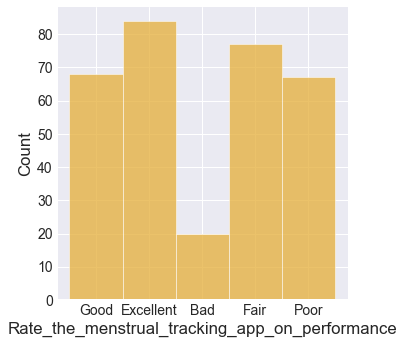

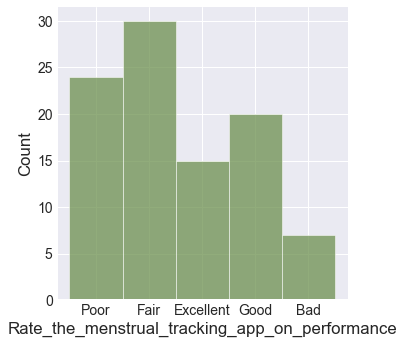

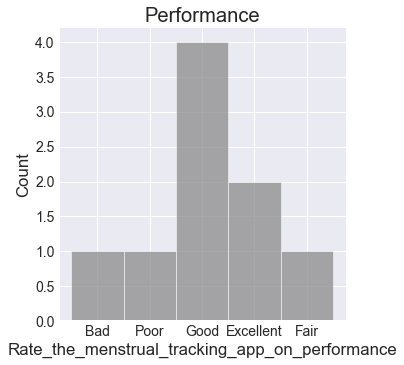

In [44]:
# Rate on performance
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate_the_menstrual_tracking_app_on_performance').add_legend()
plt.title('Performance')
plt.show()

In [45]:
data_2['Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)'].replace([1, 2,3,4,5], ['Bad','Poor','Fair','Good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

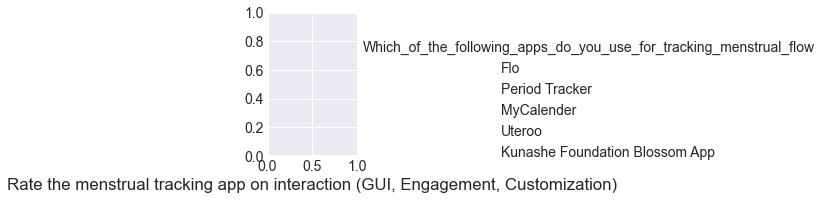

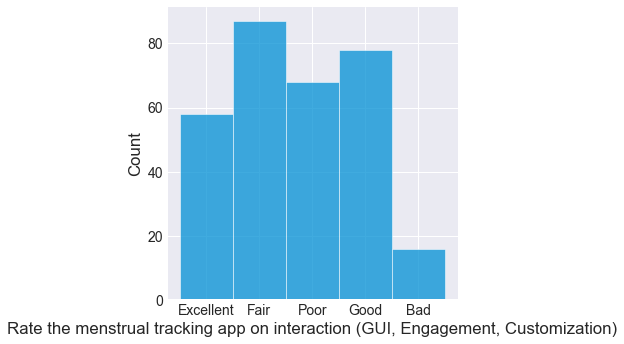

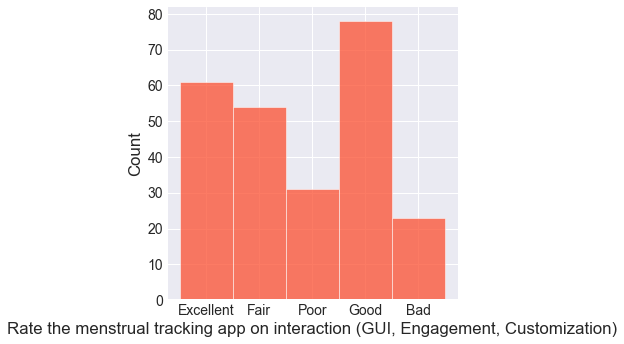

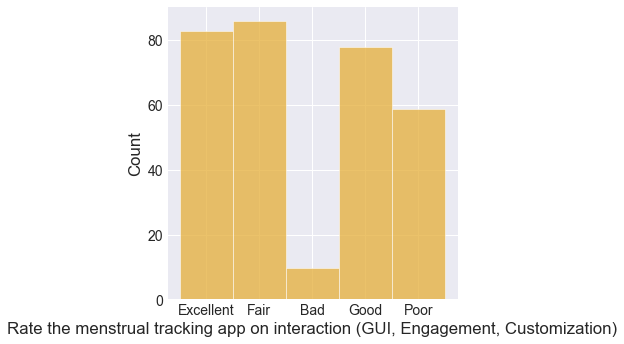

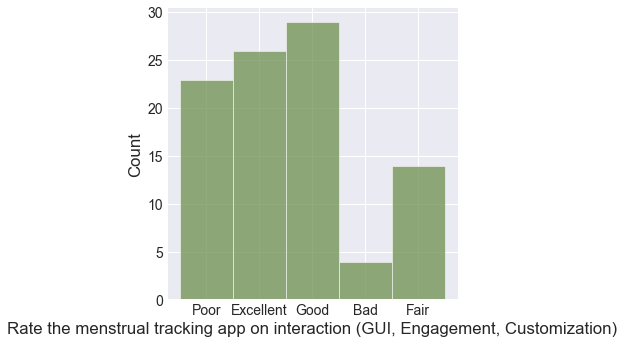

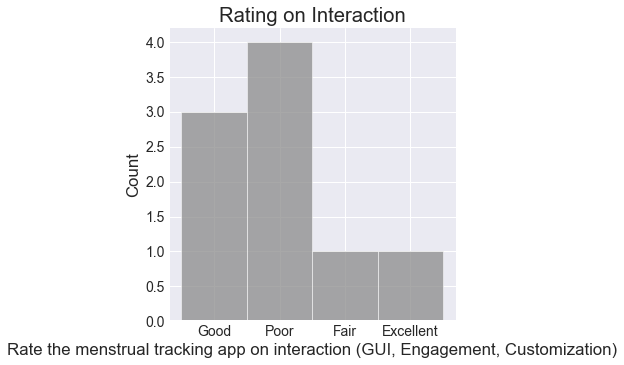

In [46]:
#Rating on Interaction(GUI, Engagement, Customization)
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)').add_legend()
plt.title('Rating on Interaction')
plt.show()

In [47]:
data_2['Rate the menstrual tracking app on Mobile Application Accuracy'].replace([1, 2,3,4,5], ['Bad','Poor','Fair','Good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

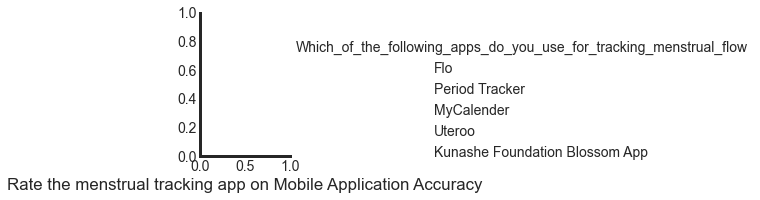

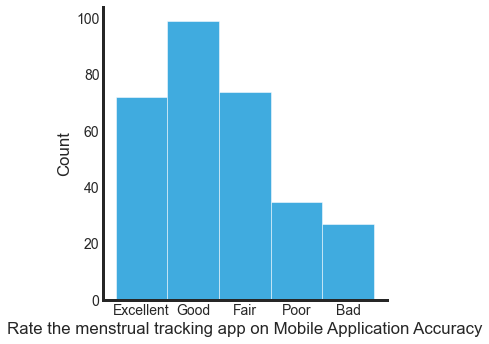

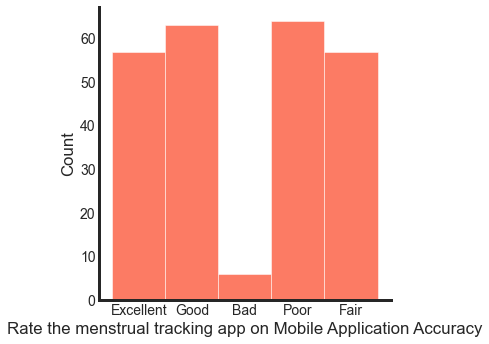

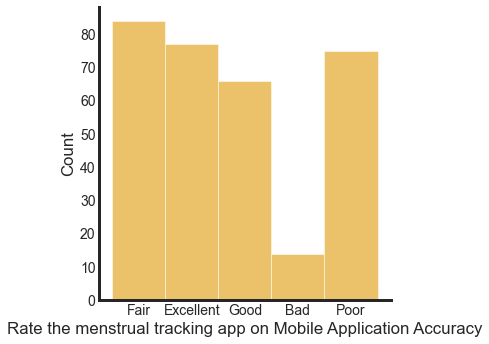

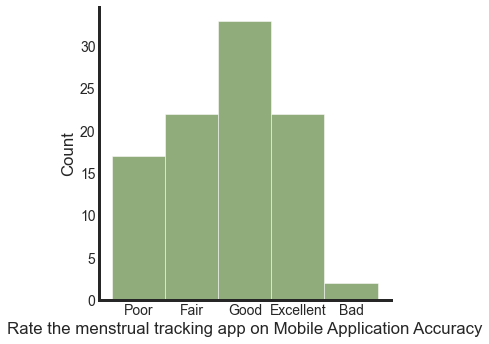

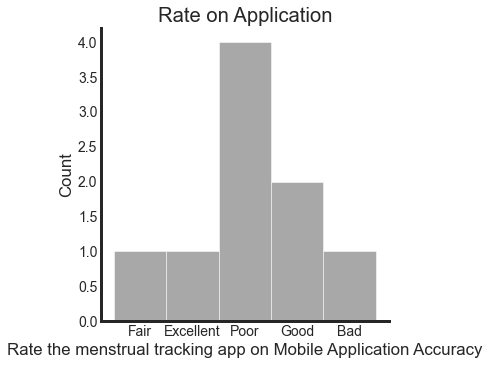

In [48]:
#Rate on Application
sns.set_style('white')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate the menstrual tracking app on Mobile Application Accuracy').add_legend()
plt.title('Rate on Application')
plt.show()

In [49]:
data_2['Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality)'].replace([1, 2,3,4,5], ['Bad','Fair','Good', 'Very good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

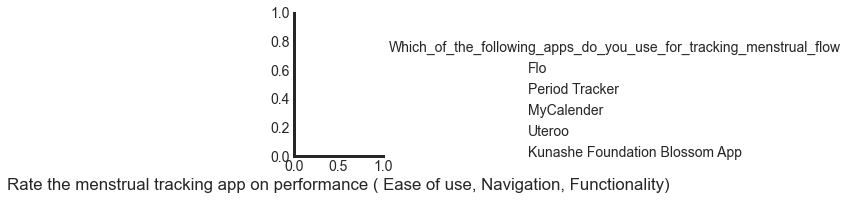

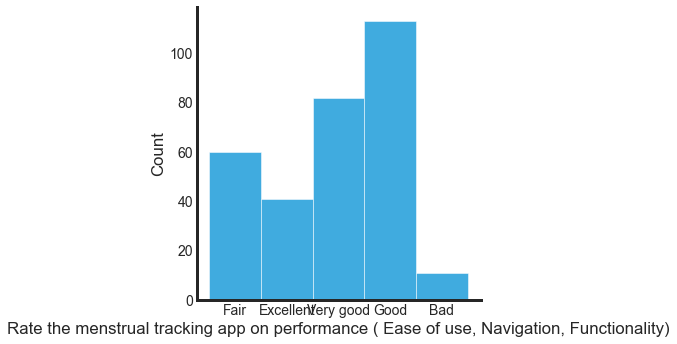

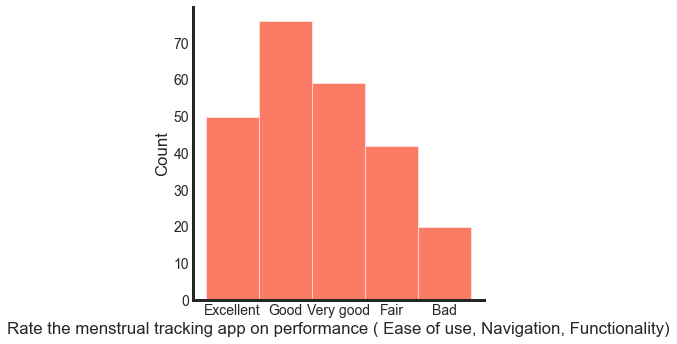

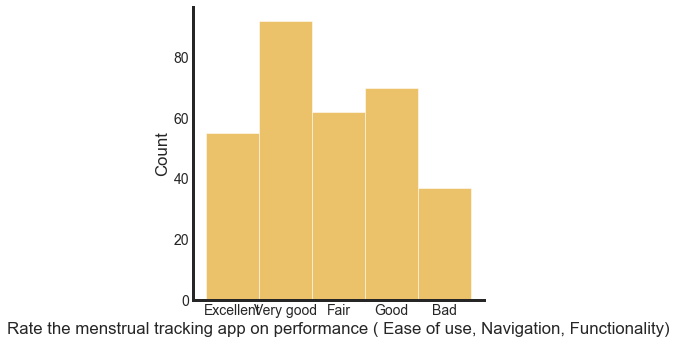

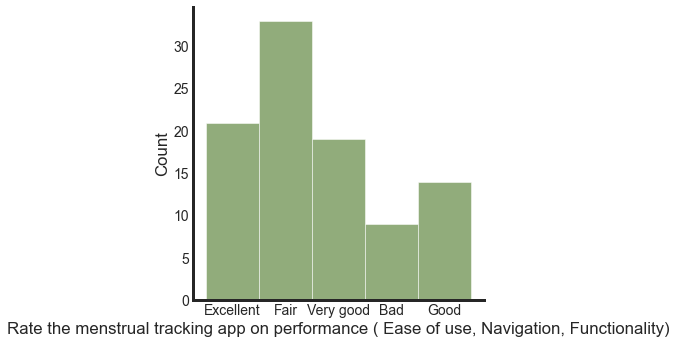

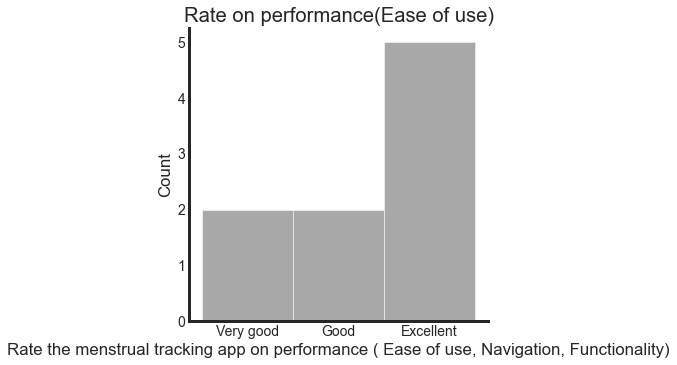

In [50]:
#Rate on performance(Ease of use)
sns.set_style('white')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality)').add_legend()
plt.title('Rate on performance(Ease of use)')
plt.show()

In [51]:
data_2['Rate_the_menstrual_tracking_app_on_Aesthetics_(Visual Appeal, Graphics Layout, Resolutions)'].replace([1, 2,3,4,5], ['Bad','Fair','Good', 'Very good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

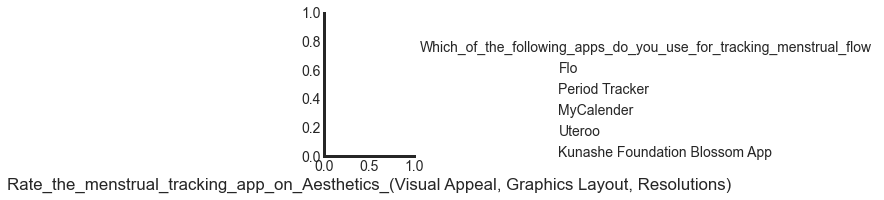

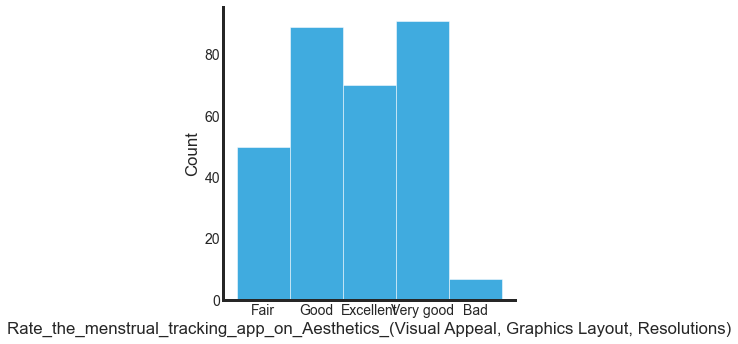

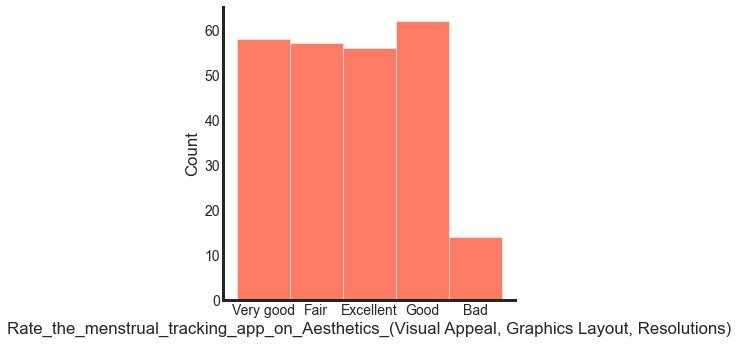

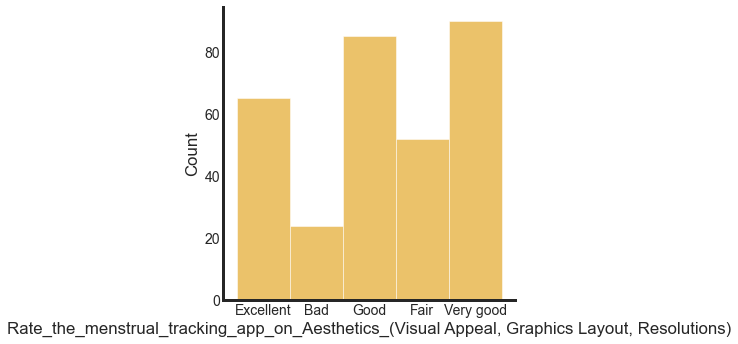

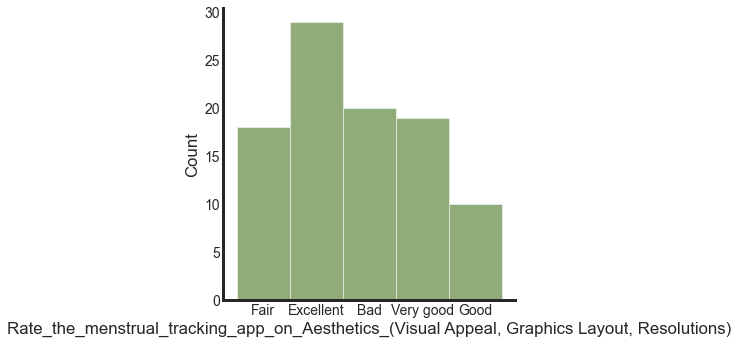

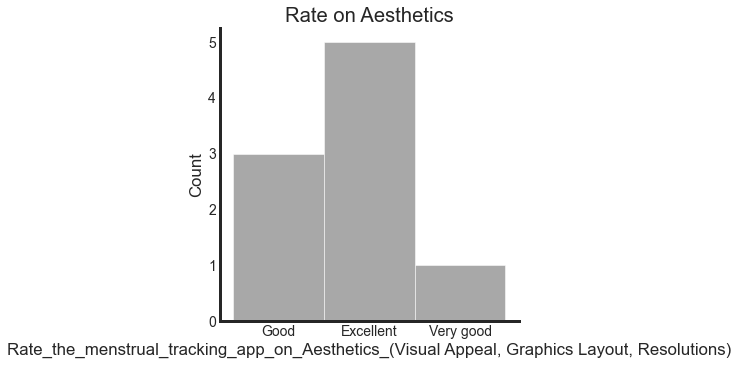

In [52]:
#Rate on Aesthetics
sns.set_style('white')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate_the_menstrual_tracking_app_on_Aesthetics_(Visual Appeal, Graphics Layout, Resolutions)').add_legend()
plt.title('Rate on Aesthetics')
plt.show()

In [53]:
data_2['Rate the menstrual tracking app on Overall App Ratings'].replace([1, 2,3,4,5], ['Bad','Fair','Good', 'Very good','Excellent'], inplace=True)

<Figure size 576x360 with 0 Axes>

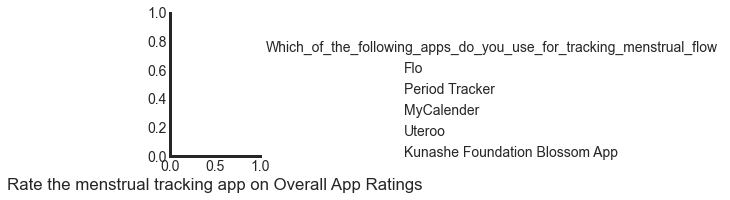

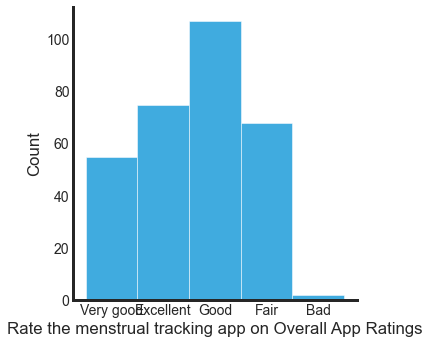

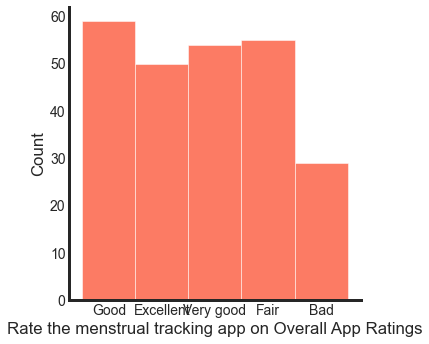

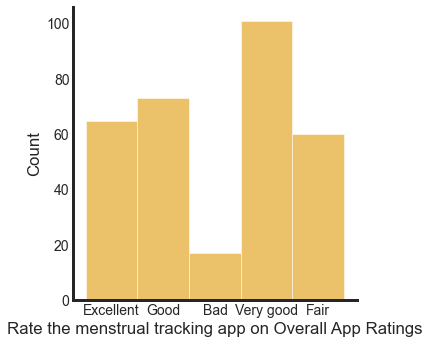

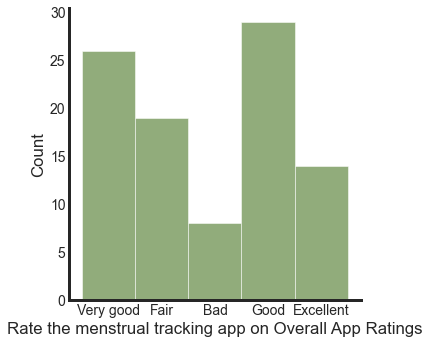

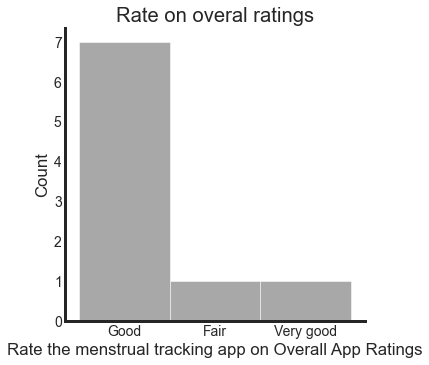

In [54]:
#Rate on overall ratings
sns.set_style('white')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Rate the menstrual tracking app on Overall App Ratings').add_legend()
plt.title('Rate on overal ratings')
plt.show()

<Figure size 576x360 with 0 Axes>

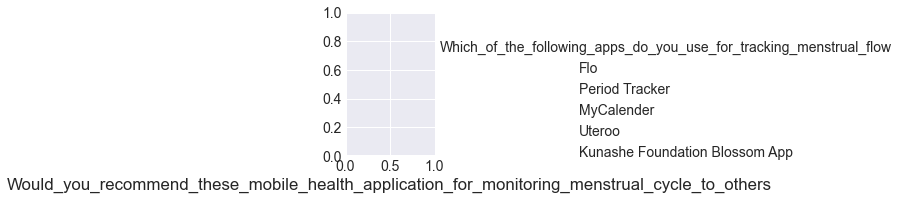

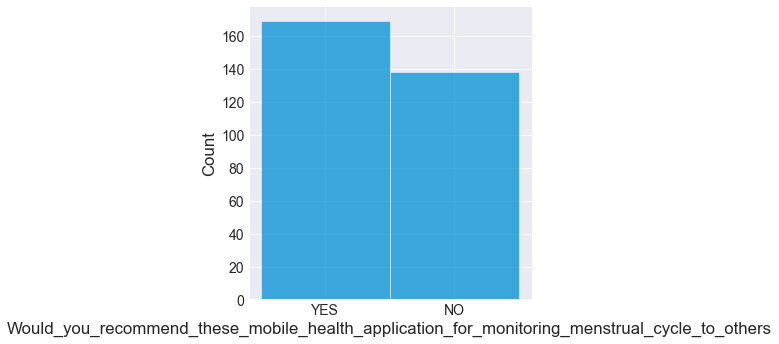

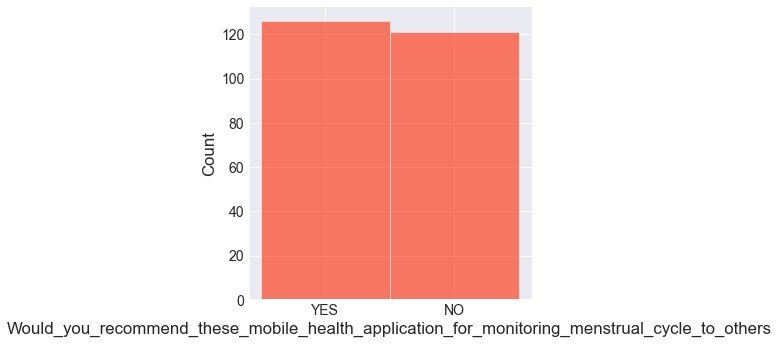

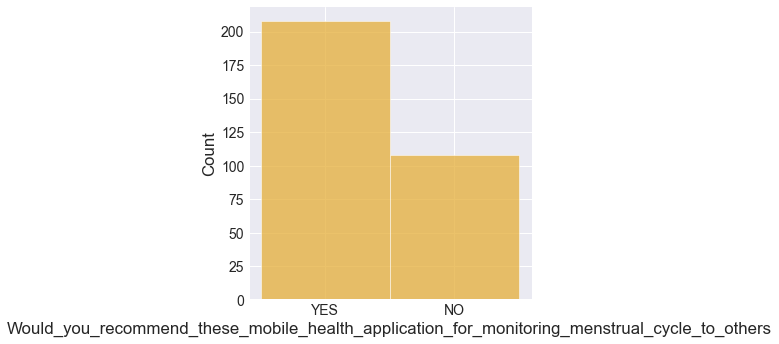

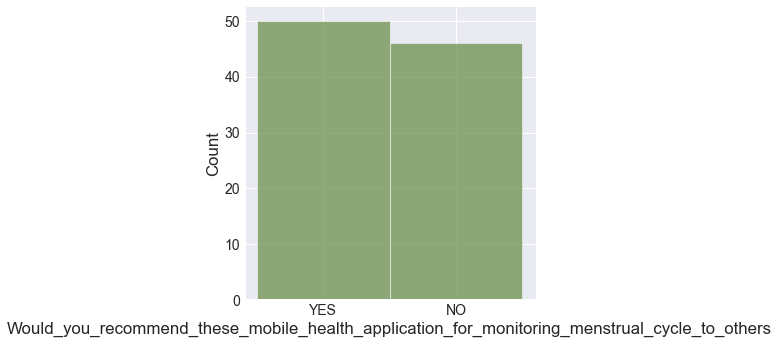

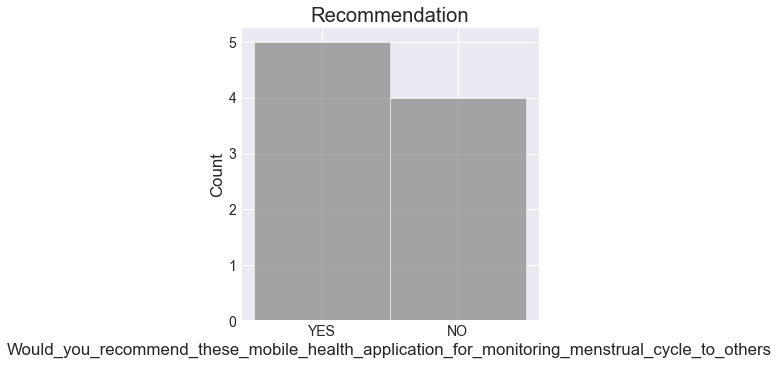

In [55]:
#Recommendation of the apps
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others').add_legend()
plt.title('Recommendation')
plt.show()

<Figure size 576x360 with 0 Axes>

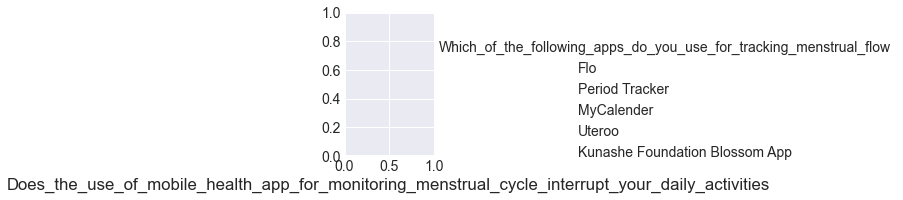

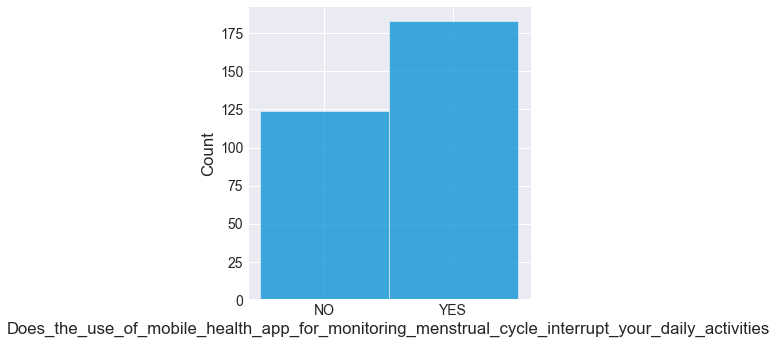

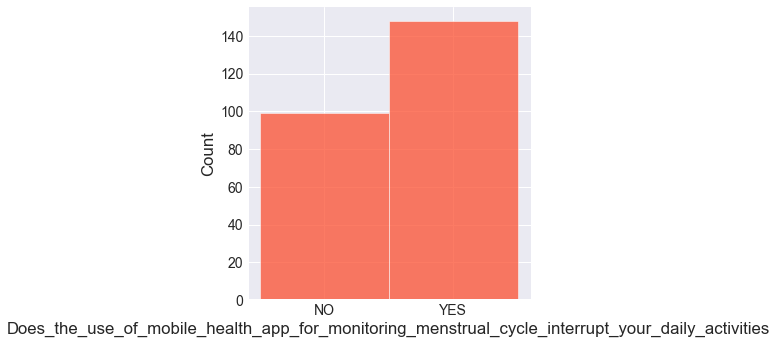

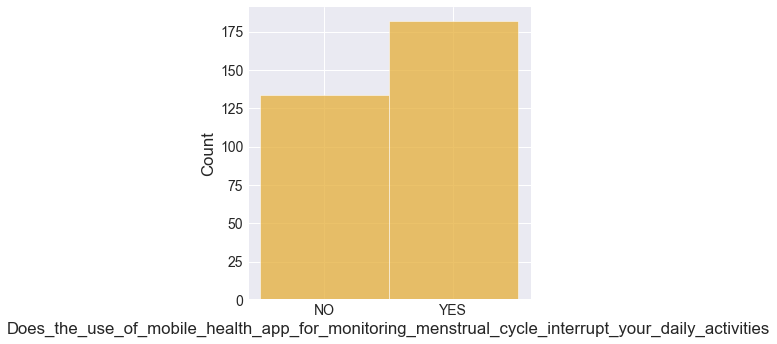

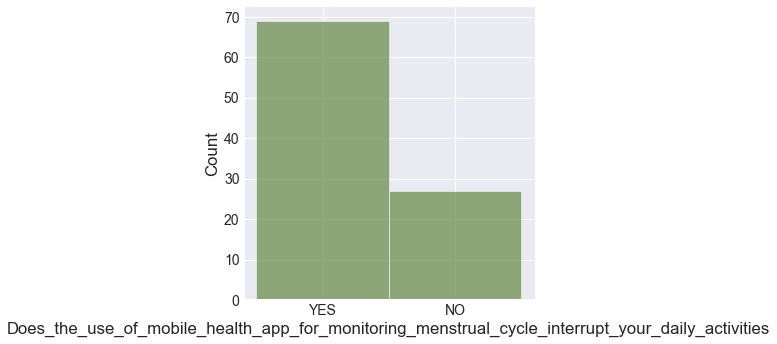

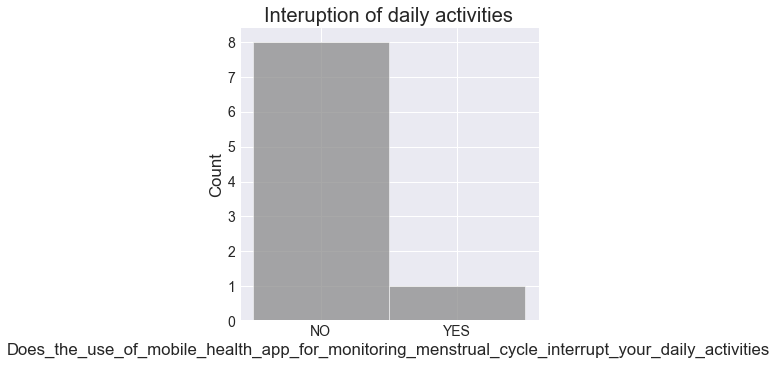

In [56]:
#Interuption of daily activities
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities').add_legend()
plt.title('Interuption of daily activities')
plt.show()

- More users of Kunashe Foundation Blossom App claim that the app doesnt affect their daily activities compared to other apps.

<Figure size 576x360 with 0 Axes>

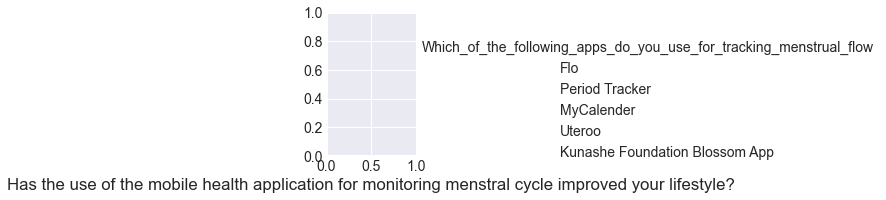

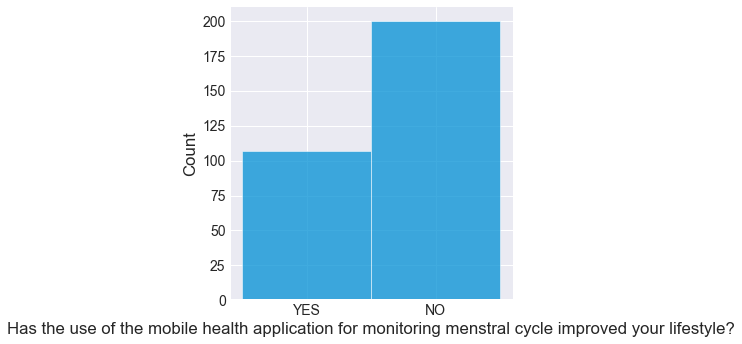

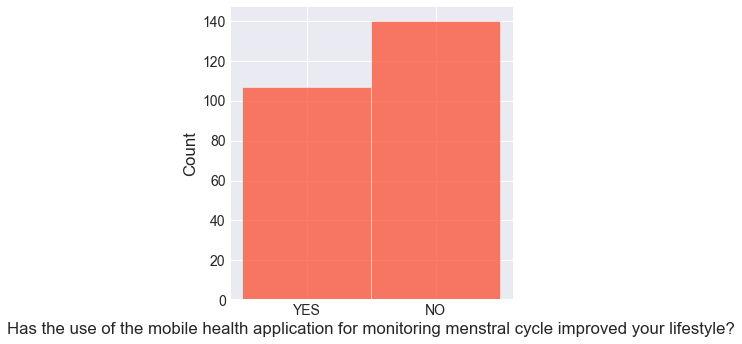

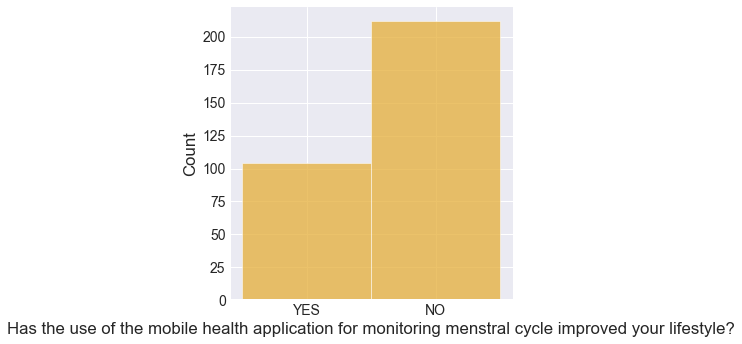

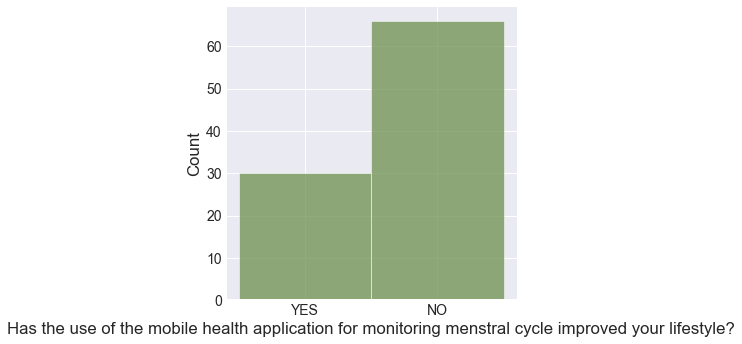

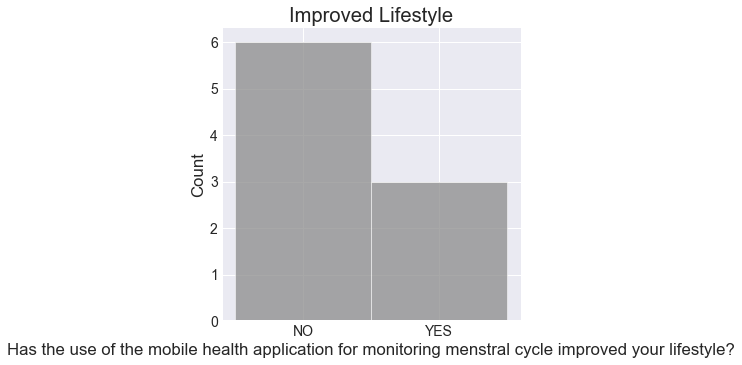

In [57]:
#Improved Lifestyle
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data_2, hue="Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow").map(sns.displot,'Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?').add_legend()
plt.title('Improved Lifestyle')
plt.show()

- More users believes that none of the mobile app has improved thier lifestyle

<a name="Encoding"></a>
## 7. ENCODING

In [58]:
data_2.head()

,S/N,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)","Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
0,1,18-30 yrs,Single,1,1,Flo,1-2 years,Fair,Excellent,Fair,...,Excellent,Very good,YES,YES,NO,YES,NO,YES,YES,NO
1,2,18-30 yrs,Married,1,1,Flo,More than 2 years,Fair,Fair,Excellent,...,Excellent,Excellent,YES,YES,NO,YES,NO,YES,YES,NO
2,3,18-30 yrs,Single,1,1,Period Tracker,More than 2 years,Good,Excellent,Excellent,...,Excellent,Good,YES,YES,NO,YES,NO,YES,NO,NO
3,4,18-30 yrs,Single,1,1,Flo,Less than a year,Poor,Fair,Excellent,...,Good,Good,YES,YES,NO,YES,NO,YES,YES,NO
4,5,18-30 yrs,Single,1,2,Flo,1-2 years,Excellent,Poor,Very good,...,Fair,Fair,YES,YES,NO,YES,NO,YES,YES,NO


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   S/N                                                                                                                              975 non-null    int64  
 1   Age                                                                                                                              975 non-null    object 
 2   Marital_Status                                                                                                                   975 non-null    object 
 3   Religion                                                                                            

In [60]:
data.loc[:, ['Age','Marital_Status','Religion','Region','Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow','How_long_have_you_been_using_this_tracking_application?','Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others','Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?','Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities','Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?','Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?','Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use','Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle','Does the daily use of Mobile Health application affect the general performance of your mobile phone?']] = data[
    ['Age','Marital_Status','Religion','Region','Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow','How_long_have_you_been_using_this_tracking_application?','Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others','Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?','Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities','Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?','Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?','Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use','Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle','Does the daily use of Mobile Health application affect the general performance of your mobile phone?']
].apply(LabelEncoder().fit_transform)

<a name="Correlations"></a>
## 8. Correlations - EDA

In [61]:
data.head()

,S/N,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)","Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality)",...,Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle,Does the daily use of Mobile Health application affect the general performance of your mobile phone?
0,1,0,2,1,0,0,0,3.0,5.0,2.0,...,5.0,4.0,1,1,0,1,0,1,1,0
1,2,0,1,1,0,0,2,3.0,3.0,5.0,...,5.0,5.0,1,1,0,1,0,1,1,0
2,3,0,2,1,0,3,2,4.0,5.0,5.0,...,5.0,3.0,1,1,0,1,0,1,0,0
3,4,0,2,1,0,0,1,2.0,3.0,5.0,...,4.0,3.0,1,1,0,1,0,1,1,0
4,5,0,2,1,1,0,0,5.0,2.0,4.0,...,3.0,2.0,1,1,0,1,0,1,1,0


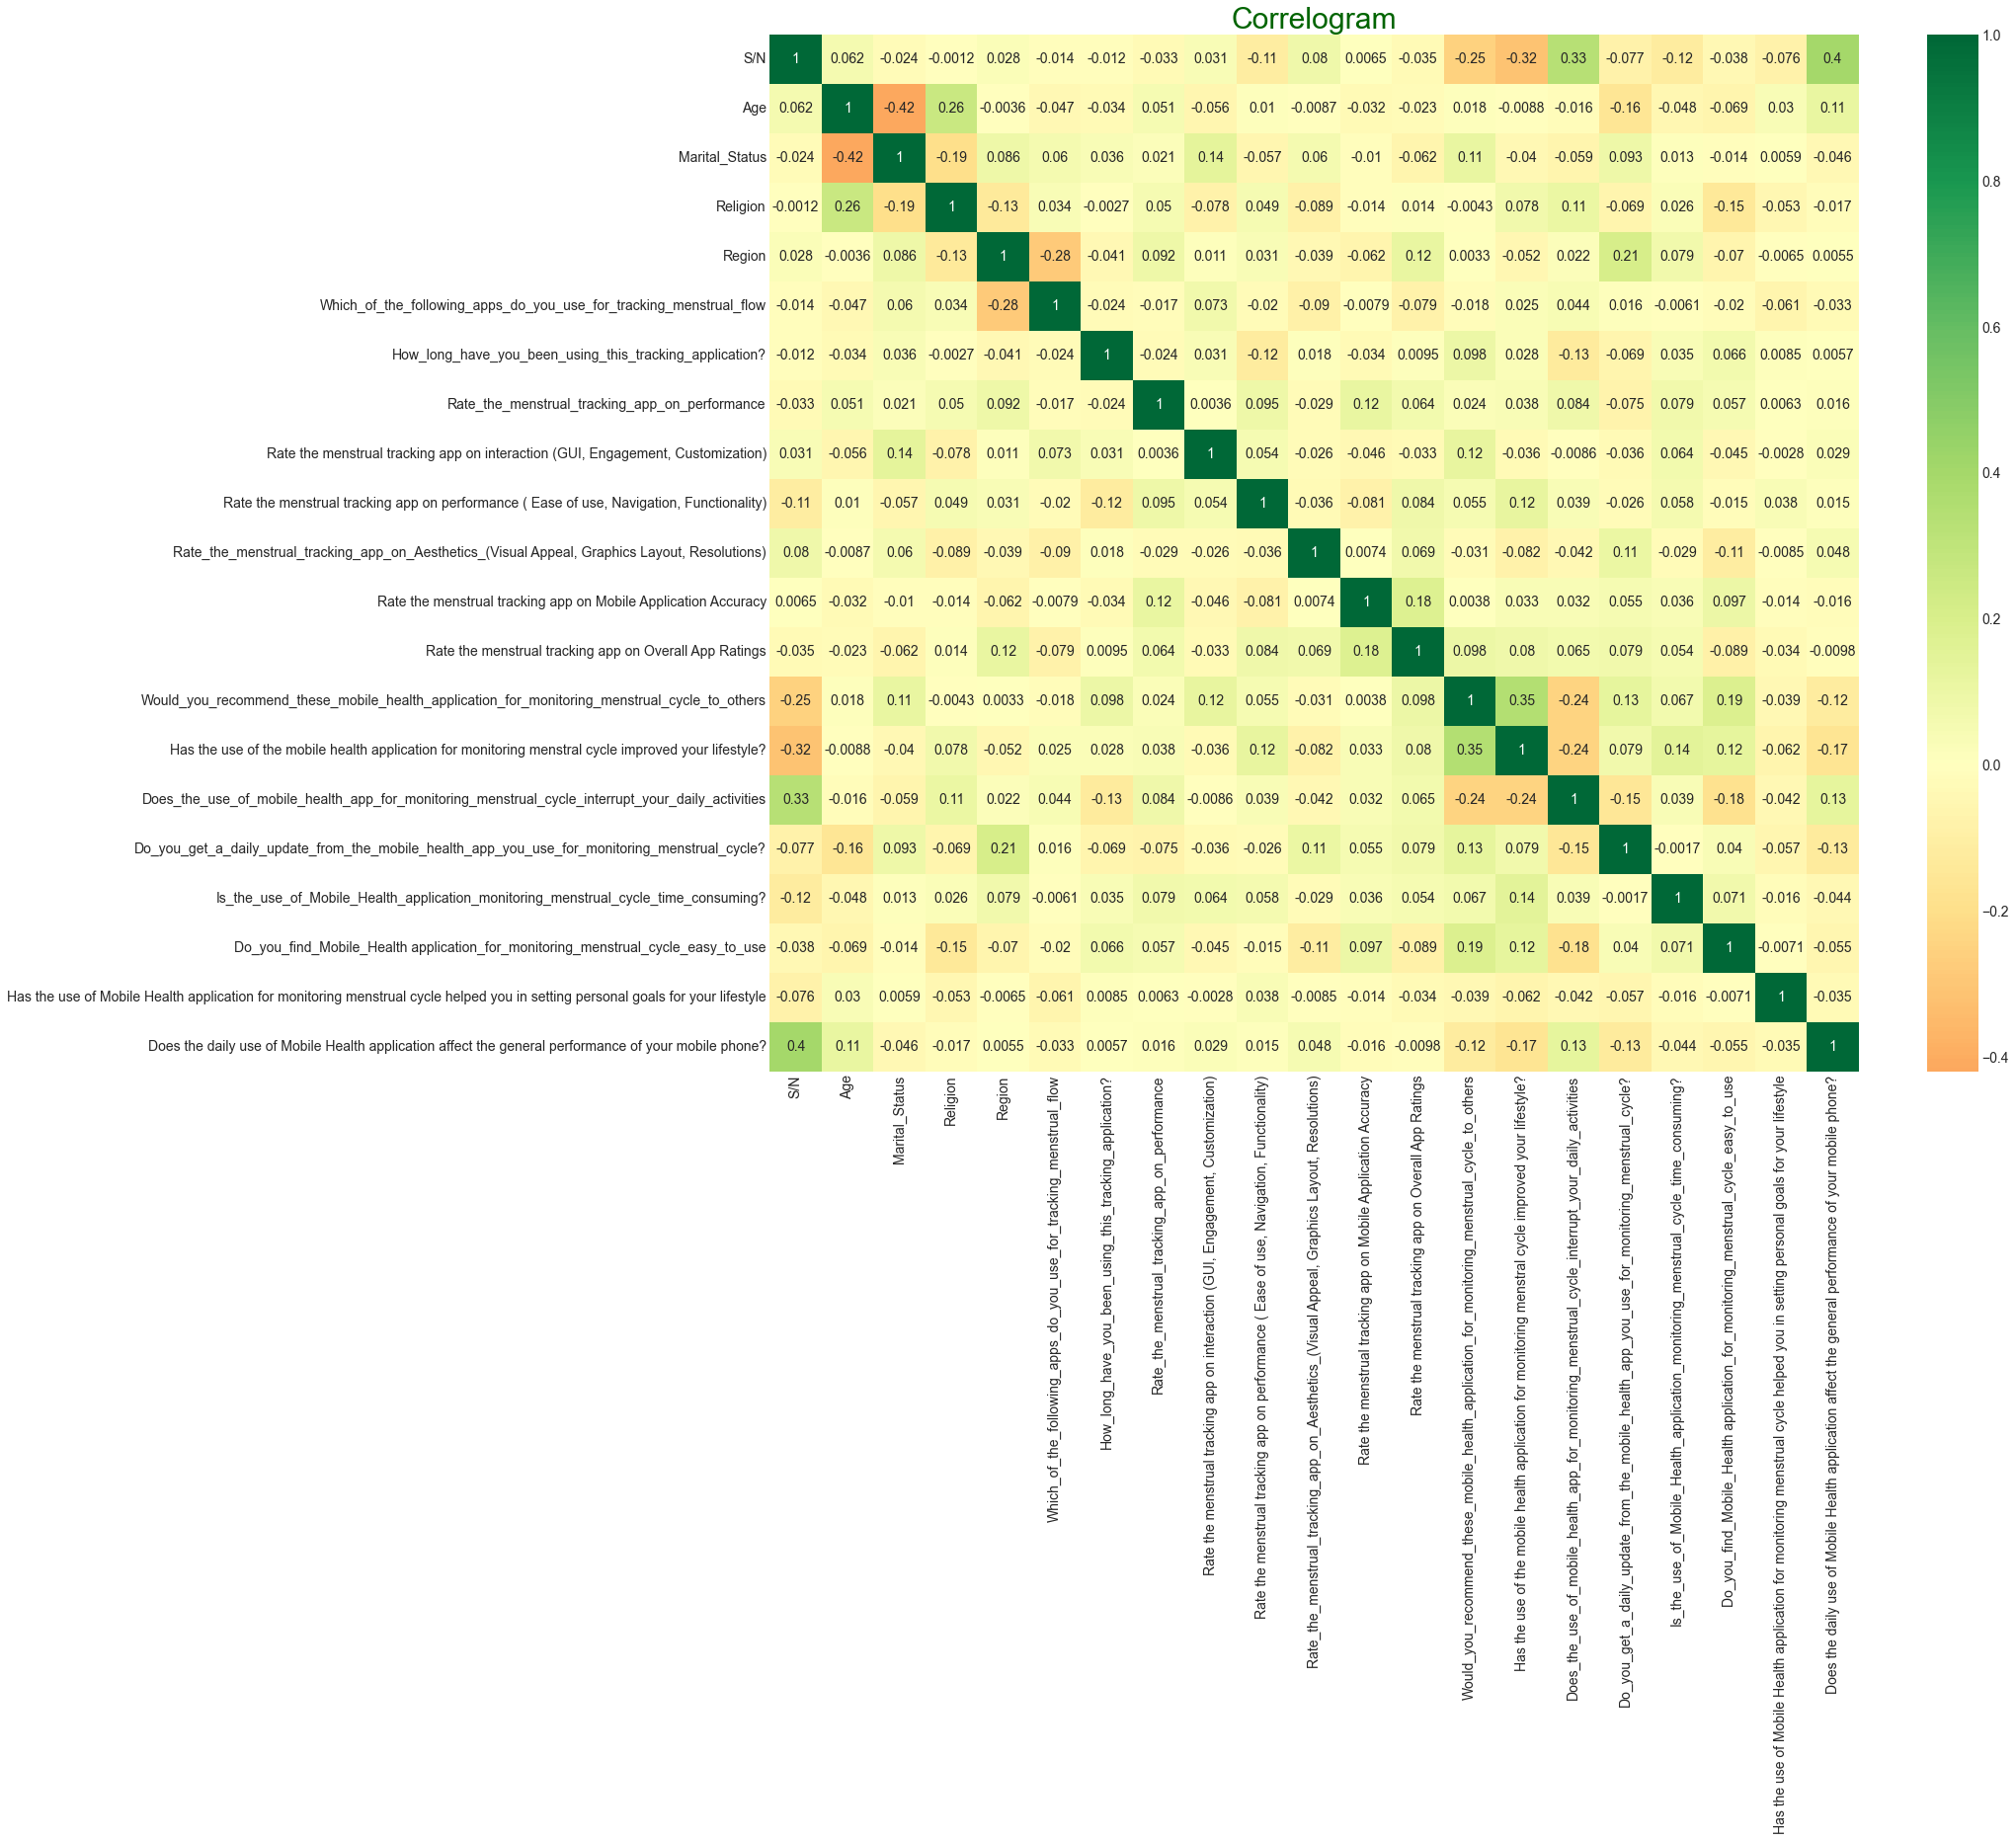

In [62]:
# Quantify correlations
corr = data.corr()
plt.figure(figsize = (22, 18))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 30, color = 'darkgreen')
plt.show()

In [63]:
data = data.drop(columns = 'S/N')

<a name="Feature"></a>
## 9. Feature Engineering - EDA

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
target_column = 'Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow'

target = data[target_column]
data1 = data.drop(target_column, axis=1)

In [66]:
decision_tree_clf = DecisionTreeClassifier()

In [67]:
decision_tree_clf.fit(data1, target)

DecisionTreeClassifier()

In [68]:
# Previewing the features and their importance

for col, fi in zip(data1, decision_tree_clf.feature_importances_):
    print(col, round(fi * 100, 2), sep=" | ")

Age | 3.62
Marital_Status | 3.89
Religion | 2.42
Region | 2.86
How_long_have_you_been_using_this_tracking_application? | 5.75
Rate_the_menstrual_tracking_app_on_performance | 12.55
Rate the menstrual tracking app on interaction (GUI, Engagement, Customization) | 6.26
Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality) | 9.2
Rate_the_menstrual_tracking_app_on_Aesthetics_(Visual Appeal, Graphics Layout, Resolutions) | 11.84
Rate the menstrual tracking app on Mobile Application Accuracy | 11.59
Rate the menstrual tracking app on Overall App Ratings | 8.06
Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others | 3.56
Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle? | 4.2
Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities | 6.24
Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle? |

In [69]:
# Previwing the features and their importance in the order of their importance

for fi, col in sorted(zip(decision_tree_clf.feature_importances_, data1), reverse=True):
    print(col, round(fi * 100, 2), sep=" | ")

Rate_the_menstrual_tracking_app_on_performance | 12.55
Rate_the_menstrual_tracking_app_on_Aesthetics_(Visual Appeal, Graphics Layout, Resolutions) | 11.84
Rate the menstrual tracking app on Mobile Application Accuracy | 11.59
Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality) | 9.2
Rate the menstrual tracking app on Overall App Ratings | 8.06
Rate the menstrual tracking app on interaction (GUI, Engagement, Customization) | 6.26
Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities | 6.24
How_long_have_you_been_using_this_tracking_application? | 5.75
Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle? | 4.2
Marital_Status | 3.89
Age | 3.62
Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others | 3.56
Region | 2.86
Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming? | 2.68
Religion | 2.42
Has 

### Insights
If you summed up the importance of each feature to the predicted outcome, we would get a total of 100, implying the importance of each feature is spread in the percentage of the importance of the feature; from the most important to the least important.

So three (3) of the most important features to our dataset are the `Rate_the_menstrual_tracking_app_on_performance`, `Rate the menstrual tracking app on Mobile Application Accuracy`, and `Rate the menstrual tracking app on Aesthetics (Visual Appeal, Graphics Layout, Resolutions)`. the two least relevant features are `Does the daily use of Mobile Health application affect the general performance of your mobile phone?` and `Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use` features. With these facts, we can make decisions on the kind of features we want to make use of.

For this reason, we would be dropping the least most important features which are the `Does the daily use of Mobile Health application affect the general performance of your mobile phone?` and `Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use` features.

In [70]:
data.drop(['Does the daily use of Mobile Health application affect the general performance of your mobile phone?', 'Do_you_find_Mobile_Health application_for_monitoring_menstrual_cycle_easy_to_use'], axis=1, inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Age                                                                                                                              975 non-null    int32  
 1   Marital_Status                                                                                                                   975 non-null    int32  
 2   Religion                                                                                                                         975 non-null    int32  
 3   Region                                                                                              

In [72]:
target_column = 'Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow'

target = data[target_column]
data1 = data.drop(target_column, axis=1)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.25, random_state=42)

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [76]:
y_train.shape, y_test.shape, y_val.shape

((548,), (244,), (183,))

In [77]:
X_train.head()

,Age,Marital_Status,Religion,Region,Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow,How_long_have_you_been_using_this_tracking_application?,Rate_the_menstrual_tracking_app_on_performance,"Rate the menstrual tracking app on interaction (GUI, Engagement, Customization)","Rate the menstrual tracking app on performance ( Ease of use, Navigation, Functionality)","Rate_the_menstrual_tracking_app_on_Aesthetics_(Visual Appeal, Graphics Layout, Resolutions)",Rate the menstrual tracking app on Mobile Application Accuracy,Rate the menstrual tracking app on Overall App Ratings,Would_you_recommend_these_mobile_health_application_for_monitoring_menstrual_cycle_to_others,Has the use of the mobile health application for monitoring menstral cycle improved your lifestyle?,Does_the_use_of_mobile_health_app_for_monitoring_menstrual_cycle_interrupt_your_daily_activities,Do_you_get_a_daily_update_from_the_mobile_health_app_you_use_for_monitoring_menstrual_cycle?,Is_the_use_of_Mobile_Health_application_monitoring_menstrual_cycle_time_consuming?,Has the use of Mobile Health application for monitoring menstrual cycle helped you in setting personal goals for your lifestyle
486,0,2,1,0,4,2,1.0,4.0,2.0,2.0,4.0,3.0,0,0,1,0,0,0
982,0,2,1,0,2,0,2.0,4.0,2.0,5.0,3.0,3.0,0,0,1,1,0,0
568,0,2,1,0,3,0,2.0,5.0,5.0,3.0,4.0,3.0,1,0,1,1,0,0
483,1,2,2,0,3,2,3.0,1.0,3.0,4.0,3.0,5.0,1,1,1,1,1,1
51,1,1,2,0,3,0,4.0,5.0,4.0,3.0,4.0,4.0,1,1,0,1,1,1


In [78]:
y_test.head()

204    0
808    4
178    4
478    0
69     0
Name: Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow, dtype: int32

In [79]:
target_encoder = LabelEncoder

In [80]:
### Select KBest to check for relevant columns,for feature Selection
cols = ['Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow']
X = data.drop(cols, axis=1)
y= data['Which_of_the_following_apps_do_you_use_for_tracking_menstrual_flow']
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['features','scores']
feature_scores

,features,scores
0,Age,18.391909
1,Marital_Status,3.540691
2,Religion,2.656651
3,Region,62.682349
4,How_long_have_you_been_using_this_tracking_app...,1.106916
5,Rate_the_menstrual_tracking_app_on_performance,3.359163
6,Rate the menstrual tracking app on interaction...,2.916348
7,Rate the menstrual tracking app on performance...,4.352297
8,Rate_the_menstrual_tracking_app_on_Aesthetics_...,5.017557
9,Rate the menstrual tracking app on Mobile Appl...,2.575533


<a name="Modelling"></a>
## 10. Model Building

#### Shortlisting Promising Models
---

We have 562 training data and 250 testing data. With that set in place, we can thus proceed to shortlisting models for our experiment. We would be electing Six (6) models which would be:

1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
4. Support Vector Classifier
5. XGBoost Classifier
6. Decision Tree Classifier

In [81]:
from xgboost import XGBRegressor,XGBClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error,adjusted_rand_score,accuracy_score,classification_report, ConfusionMatrixDisplay,confusion_matrix#For evaluating built models

import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve

In [82]:
def perform_model_evaluation(
    verbose=True, time_tracker=True, peep_on_performance=True, 
    save_progress=True, progress_on_record=None, **kwargs
):
    """
    Performs evaluation on the various imputed models
    
    This is a pretty large function tarloyed to this
    task. 
    
    It has a bunch of parameters to help monitor
    the activities going on within the function
    
    verbose: Gives us details about the steps we are 
            on and the progress we're making. If True
    time_tracker: Tracks the time each model evaluation
            takes. If True
    peep_on_performance: Presents model performance at
            certain stages. If True
    save_progress: Saves the progress on evaluation to
            data/record.p at the end of each model evaluation.
            If True
    progress_on_record: Takes an already made progress
            and proceeds from that. If provided.
            File location in str needs to be provided.
    **kwargs: Other variables which would be essential
            to the operation of the function. They
            include: model_names, X_train, X_val,
                y_train, y_val, models, param_grid
    """
    
    # Variables downloading
    model_names = kwargs['model_names']
    X_train = kwargs['X_train']
    X_val = kwargs['X_val']
    y_train = kwargs['y_train']
    y_val = kwargs['y_val']
    models = kwargs['models']
    param_grid = kwargs['param_grid']
    
    # Subroutine for time tracking
    def cal_time_in_mins(start, _end, process, sep=",", end=f"\n{'+'*120}\n\n"):
        if time_tracker:
            total_time_in_sec = round(_end - start)
            mins = total_time_in_sec // 60
            sec = total_time_in_sec % 60
            print(f"{process} ran for: {mins} mins, {sec} sec", sep=sep, end=end)
            
    # Subroutine for verbose messages
    def verbose_message(message, sep=",", end=f"\n{'-'*120}\n\n"):
        if verbose:
            print(message, sep=sep, end=end)
    
    # Subroutine to save progress
    #def preform_progress_saving(r):
     #   if save_progress:
      #      pickle.dump(r, open("data/record_r.p", 'wb'))
    
    # Wrapper for estimating the time for a process
    def time_estimator_wrapper(function):
        
        def wrapper(*args):
            start = time.time()
            results = function(*args)
            end = time.time()
            
            cal_time_in_mins(start, end, "Performance Process")

            return results
        
        return wrapper
    
    # Function to perform cross validation
    @time_estimator_wrapper
    def perform_cross_val(_m, message):
        cv_scores = -cross_val_score(
            _m(), X_val, y_val,  cv=5, n_jobs=-1,
            scoring='neg_mean_absolute_error'
        )
        
        verbose_message(message)
        
        return cv_scores, cv_scores.mean()
    
    # Function to perform grid search evaluation
    @time_estimator_wrapper
    def perform_grid_search(_m, pg, message):
        grid_search = GridSearchCV(
            _m(), param_grid=pg, n_jobs=-1, cv=5,
            scoring='neg_mean_absolute_error'
        )
        
        grid_search.fit(X_train, y_train)
        
        verbose_message(message)
        
        return grid_search
    
    # Initializes record
    if progress_on_record is None:
        record = {name: {} for name in model_names}
        verbose_message("Initialized a new record")
    else:
        record = pickle.load(open(progress_on_record, 'rb'))
        verbose_message("Initialized existing record")
    
    verbose_message("Starting the models evaluation")
    
    overall_program_start = time.time()
    
    # Proceeding with model evaluations
    for name, pg, model in zip(model_names, param_grid, models):
        if not bool(record[name]):
            cvs, cvsm = perform_cross_val(
                model,
                f"Done performing cross validation for {name}"
            )

            gs = perform_grid_search(
                model, pg,
                f"Done performing grid search for {name}"
            )

            if peep_on_performance:
                print("Model Performance", name, cvsm, gs.best_params_, end=f"\n{'*'*120}\n\n")

            record[name]['cross val score'] = cvs
            record[name]['cross val score mean'] = cvsm
            record[name]['grid search'] = gs

            #preform_progress_saving(record)
    
    overall_program_end = time.time()
    
    cal_time_in_mins(overall_program_start, overall_program_end, "Program time")
    
    #preform_progress_saving(record)
    
    return record

In [83]:
models = [
    LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, 
    SVC, RandomForestClassifier, XGBClassifier
]

In [84]:
model_names = [
    'Logistic Regression', 'K-Neighbor Classifier', 'Decision Tree Classifier', 
    'Support Vector Classifier', 'Random Forest Classifier', 'XGBoost Classifier'
]

In [85]:
# We would just try out something simple

param_grid = [
    {
        'fit_intercept': [True, False]
    },
    {
        'n_neighbors': range(3, 8),
        'weights': ['uniform', 'distance'],
        'leaf_size': range(10, 51, 10),
    },
    {
        'min_samples_split': range(2, 11)
    },
    {
        'kernel': ['poly', 'rbf'],
        'C': range(1, 11)
    },
    {
        'n_estimators': range(50, 501, 50),
        'min_samples_split': range(2, 11)
    },
    {
        'n_estimators': range(50, 501, 50),
        'min_samples_split': range(2, 11),
        
    },
]

In [86]:
record = perform_model_evaluation(
    X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val,
    models=models, model_names=model_names, param_grid=param_grid
)

Initialized a new record
------------------------------------------------------------------------------------------------------------------------

Starting the models evaluation
------------------------------------------------------------------------------------------------------------------------

Done performing cross validation for Logistic Regression
------------------------------------------------------------------------------------------------------------------------

Performance Process ran for: 0 mins, 3 sec
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Done performing grid search for Logistic Regression
------------------------------------------------------------------------------------------------------------------------

Performance Process ran for: 0 mins, 0 sec
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Model Performance

In [87]:
for r in record:
    print(r, record[r], sep=" | ", end="\n\n")

Logistic Regression | {'cross val score': array([0.02702703, 0.02702703, 0.05405405, 0.05555556, 0.05555556]), 'cross val score mean': 0.04384384384384384, 'grid search': GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')}

K-Neighbor Classifier | {'cross val score': array([0.37837838, 0.27027027, 0.2972973 , 0.38888889, 0.36111111]), 'cross val score mean': 0.3391891891891892, 'grid search': GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(10, 51, 10),
                         'n_neighbors': range(3, 8),
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')}

Decision Tree Classifier | {'cross val score': array([0.        , 0.        , 0.02702703, 0.        , 0.        ]), 'cross val score mean': 0.005405405405405406, 'grid search': GridSearchCV(cv=5, estim

#### Insights:
- K-Neighbor Classifier  and the Support Vector Classifier seems to be the best models

#### Fine-Tuning The Model
---

We'll be combining both  K-Neighbor Classifier  and the Support Vector Classifier models to create a new model (a voting classifier) for this task in our attempt to create a fine-tuned model.

Since we would be combining two (2) models, we would have to fine-tune both models to see how they can be improved. There are 2 ways we can do this:

1. We could fine-tune each model individually and combine them to create a new voting classifier
2. we could create a voting classifier model and fine-tune the hyper-parameters of the voting classifier.

We would use the second technique, we'll start by creating a voting classifier combining both the logistic regression and random forest model, and then fine-tune that model.

In [88]:
from sklearn.ensemble import VotingClassifier

In [89]:
model = VotingClassifier(
    estimators=[('kn', KNeighborsClassifier()), ('svc', SVC())],
    voting='soft')


In [90]:
#Performing cross validation
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
scores

array([nan, nan, nan, nan, nan])

We could see here that the voting classifier between K-Neighbor Classifier  and the Support Vector Classifier is nan scores.
Hence we would use the Logistic Regression since it is the next best model after Support Vector Classifier with the K-Neigbour Classifier to see what it has in store for us.

In [91]:
model = VotingClassifier(
    estimators=[('kn', KNeighborsClassifier()), ('lr', LogisticRegression())],
    voting='soft')

In [92]:
scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
scores

array([0.97272727, 0.94545455, 0.93636364, 0.98165138, 0.96330275])

In [93]:
scores.mean()

0.9598999165971642

### Insights
Performing simple cross-validation on the model, we can see that it performs far better than the K-Neighbour Classifier model and as well as the Logistic Regression model. Makes sense for us to see something like this as the model is combining the performance of both models.

In [94]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

<a name="Prediction"></a>
## 11. PREDICTION

We'll be evaluating the model's final performance across the accuracy, precision, and recall metrics to see the accuracy, precision, and recall rate of our model.

In [95]:
predictions = model.predict(X_test)

In [96]:
#accuracy score
accuracy_score(y_test, predictions)

0.9549180327868853

In [97]:
#precision score
precision_score(y_test, predictions, average='weighted')

0.9487660103507098

In [98]:
#recall score
recall_score(y_test, predictions, average='macro')

0.7600855587243972

Our model has a 95.49% accuracy, 94.87% precision, and 76.01% recall.
Let's quickly observe the relationship that exists between precision and recall.

In [99]:
# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, predictions)}')
print('\n')
print(f'{classification_report(y_test, predictions)}')

Accuracy score: 0.9549180327868853


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       0.00      0.00      0.00         3
           2       0.97      0.96      0.97        76
           3       0.90      0.98      0.94        58
           4       1.00      0.86      0.92        28

    accuracy                           0.95       244
   macro avg       0.77      0.76      0.76       244
weighted avg       0.95      0.95      0.95       244



- We can deduce from this that our model is accurate

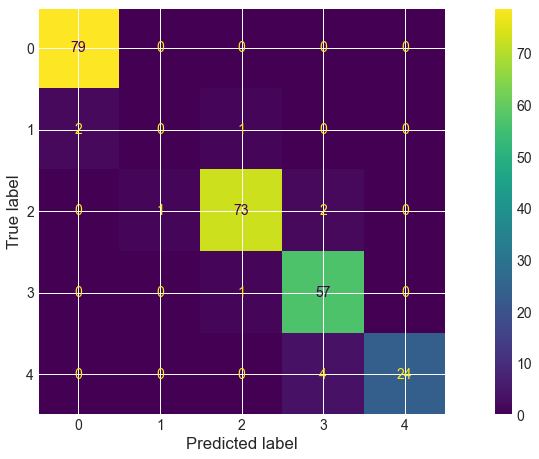

In [100]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

This is a confusion matrix showing the relationship between true label and the predicted label.
- There is high correlation of 79 between the value '0' of True label and that of predicted label.
- Likewise also their is high correlation of 73 between the value '2' of True label and that of predicted label.